### Reference/Credits: Omar Medhat Moslhi, “New full Iris Recognition System and Iris Segmentation Technique Using Image Processing and Deep Convolutional Neural Network,” International Journal of Scientific Research in Multidisciplinary Studies , Vol.6, Issue.3, pp.20-27, 2020.

### Importing the libraries and writing a function to process the image transformation of the image. Transformation involves extracting and processing the features into morphological features and removal of noise from the images.

In [25]:
import cv2
import numpy as np
import glob
import pickle
import os

eyescascadeClassifier = cv2.CascadeClassifier('haarcascade_eye.xml')

def image_transformer(eye_image,threshold):
    returnvalue, threshold = cv2.threshold(eye_image, threshold, 255, cv2.THRESH_BINARY)
    eye_opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)
    eye_closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
    openclose_operand = cv2.bitwise_or(eye_opening, eye_closing, mask = None)
    return openclose_operand,eye_opening,eye_closing

### Reading all the images from the files

In [26]:
eye_images = []
image_label=0
final_output = []
y_eye_labels = []
eye_detected = []
iris_detected=[]

for dir_path in glob.iglob('Iris/*'):
    curr=0
    for dir_root_path in glob.iglob(dir_path+'/L/*'):
        if dir_root_path[-1] == 'g':
            eye_image = cv2.imread(dir_root_path)
            eye_image = cv2.resize(eye_image,(200,150))
            eye_image = cv2.cvtColor(eye_image, cv2.COLOR_BGR2GRAY)
            eye_images.append([eye_image,curr,image_label,eye_image])
            print(dir_root_path)
            curr = curr+1

    for dir_root_path in glob.iglob(dir_path+'/R/*'):
        if dir_root_path[-1] == 'g':    
            eye_image = cv2.imread(dir_root_path)
            eye_image = cv2.resize(eye_image,(200,150))
            eye_image = cv2.cvtColor(eye_image, cv2.COLOR_BGR2GRAY)
            eye_images.append([eye_image,curr,image_label,eye_image])
            print(dir_root_path)
            curr = curr+1     
    image_label=image_label+1

#print("Total images number ",len(eye_images))

Iris/797/L/S5797L09.jpg
Iris/797/L/S5797L08.jpg
Iris/797/L/S5797L00.jpg
Iris/797/L/S5797L01.jpg
Iris/797/L/S5797L03.jpg
Iris/797/L/S5797L02.jpg
Iris/797/L/S5797L06.jpg
Iris/797/L/S5797L07.jpg
Iris/797/L/S5797L05.jpg
Iris/797/L/S5797L04.jpg
Iris/797/R/S5797R08.jpg
Iris/797/R/S5797R09.jpg
Iris/797/R/S5797R07.jpg
Iris/797/R/S5797R06.jpg
Iris/797/R/S5797R04.jpg
Iris/797/R/S5797R05.jpg
Iris/797/R/S5797R01.jpg
Iris/797/R/S5797R00.jpg
Iris/797/R/S5797R02.jpg
Iris/797/R/S5797R03.jpg
Iris/909/L/S5909L06.jpg
Iris/909/L/S5909L07.jpg
Iris/909/L/S5909L05.jpg
Iris/909/L/S5909L04.jpg
Iris/909/L/S5909L00.jpg
Iris/909/L/S5909L01.jpg
Iris/909/L/S5909L03.jpg
Iris/909/L/S5909L02.jpg
Iris/909/L/S5909L09.jpg
Iris/909/L/S5909L08.jpg
Iris/909/R/S5909R01.jpg
Iris/909/R/S5909R00.jpg
Iris/909/R/S5909R02.jpg
Iris/909/R/S5909R03.jpg
Iris/909/R/S5909R07.jpg
Iris/909/R/S5909R06.jpg
Iris/909/R/S5909R04.jpg
Iris/909/R/S5909R05.jpg
Iris/909/R/S5909R08.jpg
Iris/909/R/S5909R09.jpg
Iris/135/L/S5135L09.jpg
Iris/135/L/S5135

Iris/104/L/S5104L07.jpg
Iris/104/L/S5104L06.jpg
Iris/104/L/S5104L08.jpg
Iris/104/L/S5104L09.jpg
Iris/104/R/S5104R05.jpg
Iris/104/R/S5104R04.jpg
Iris/104/R/S5104R06.jpg
Iris/104/R/S5104R07.jpg
Iris/104/R/S5104R03.jpg
Iris/104/R/S5104R02.jpg
Iris/104/R/S5104R00.jpg
Iris/104/R/S5104R01.jpg
Iris/104/R/S5104R09.jpg
Iris/104/R/S5104R08.jpg
Iris/560/L/S5560L01.jpg
Iris/560/L/S5560L00.jpg
Iris/560/L/S5560L02.jpg
Iris/560/L/S5560L03.jpg
Iris/560/L/S5560L07.jpg
Iris/560/L/S5560L06.jpg
Iris/560/L/S5560L04.jpg
Iris/560/L/S5560L05.jpg
Iris/560/L/S5560L08.jpg
Iris/560/L/S5560L09.jpg
Iris/560/R/S5560R06.jpg
Iris/560/R/S5560R07.jpg
Iris/560/R/S5560R05.jpg
Iris/560/R/S5560R04.jpg
Iris/560/R/S5560R00.jpg
Iris/560/R/S5560R01.jpg
Iris/560/R/S5560R03.jpg
Iris/560/R/S5560R02.jpg
Iris/560/R/S5560R09.jpg
Iris/560/R/S5560R08.jpg
Iris/752/L/S5752L08.jpg
Iris/752/L/S5752L09.jpg
Iris/752/L/S5752L02.jpg
Iris/752/L/S5752L03.jpg
Iris/752/L/S5752L01.jpg
Iris/752/L/S5752L00.jpg
Iris/752/L/S5752L04.jpg
Iris/752/L/S5752

Iris/706/L/S5706L06.jpg
Iris/706/L/S5706L04.jpg
Iris/706/L/S5706L05.jpg
Iris/706/L/S5706L08.jpg
Iris/706/L/S5706L09.jpg
Iris/706/R/S5706R06.jpg
Iris/706/R/S5706R07.jpg
Iris/706/R/S5706R05.jpg
Iris/706/R/S5706R04.jpg
Iris/706/R/S5706R00.jpg
Iris/706/R/S5706R01.jpg
Iris/706/R/S5706R03.jpg
Iris/706/R/S5706R02.jpg
Iris/706/R/S5706R09.jpg
Iris/706/R/S5706R08.jpg
Iris/534/L/S5534L08.jpg
Iris/534/L/S5534L09.jpg
Iris/534/L/S5534L02.jpg
Iris/534/L/S5534L03.jpg
Iris/534/L/S5534L01.jpg
Iris/534/L/S5534L00.jpg
Iris/534/L/S5534L04.jpg
Iris/534/L/S5534L05.jpg
Iris/534/L/S5534L07.jpg
Iris/534/L/S5534L06.jpg
Iris/534/R/S5534R09.jpg
Iris/534/R/S5534R08.jpg
Iris/534/R/S5534R05.jpg
Iris/534/R/S5534R04.jpg
Iris/534/R/S5534R06.jpg
Iris/534/R/S5534R07.jpg
Iris/534/R/S5534R03.jpg
Iris/534/R/S5534R02.jpg
Iris/534/R/S5534R00.jpg
Iris/534/R/S5534R01.jpg
Iris/998/L/S5998L08.jpg
Iris/998/L/S5998L09.jpg
Iris/998/L/S5998L07.jpg
Iris/998/L/S5998L06.jpg
Iris/998/L/S5998L04.jpg
Iris/998/L/S5998L05.jpg
Iris/998/L/S5998

Iris/161/R/S5161R02.jpg
Iris/161/R/S5161R03.jpg
Iris/161/R/S5161R08.jpg
Iris/161/R/S5161R09.jpg
Iris/505/L/S5505L03.jpg
Iris/505/L/S5505L02.jpg
Iris/505/L/S5505L00.jpg
Iris/505/L/S5505L01.jpg
Iris/505/L/S5505L05.jpg
Iris/505/L/S5505L04.jpg
Iris/505/L/S5505L06.jpg
Iris/505/L/S5505L07.jpg
Iris/505/L/S5505L09.jpg
Iris/505/L/S5505L08.jpg
Iris/505/R/S5505R04.jpg
Iris/505/R/S5505R05.jpg
Iris/505/R/S5505R07.jpg
Iris/505/R/S5505R06.jpg
Iris/505/R/S5505R02.jpg
Iris/505/R/S5505R03.jpg
Iris/505/R/S5505R01.jpg
Iris/505/R/S5505R00.jpg
Iris/505/R/S5505R08.jpg
Iris/505/R/S5505R09.jpg
Iris/737/L/S5737L09.jpg
Iris/737/L/S5737L08.jpg
Iris/737/L/S5737L00.jpg
Iris/737/L/S5737L01.jpg
Iris/737/L/S5737L03.jpg
Iris/737/L/S5737L02.jpg
Iris/737/L/S5737L06.jpg
Iris/737/L/S5737L07.jpg
Iris/737/L/S5737L05.jpg
Iris/737/L/S5737L04.jpg
Iris/737/R/S5737R08.jpg
Iris/737/R/S5737R09.jpg
Iris/737/R/S5737R07.jpg
Iris/737/R/S5737R06.jpg
Iris/737/R/S5737R04.jpg
Iris/737/R/S5737R05.jpg
Iris/737/R/S5737R01.jpg
Iris/737/R/S5737

Iris/765/L/S5765L03.jpg
Iris/765/L/S5765L07.jpg
Iris/765/L/S5765L06.jpg
Iris/765/L/S5765L04.jpg
Iris/765/L/S5765L05.jpg
Iris/765/L/S5765L08.jpg
Iris/765/L/S5765L09.jpg
Iris/765/R/S5765R06.jpg
Iris/765/R/S5765R07.jpg
Iris/765/R/S5765R05.jpg
Iris/765/R/S5765R04.jpg
Iris/765/R/S5765R00.jpg
Iris/765/R/S5765R01.jpg
Iris/765/R/S5765R03.jpg
Iris/765/R/S5765R02.jpg
Iris/765/R/S5765R09.jpg
Iris/765/R/S5765R08.jpg
Iris/557/L/S5557L08.jpg
Iris/557/L/S5557L09.jpg
Iris/557/L/S5557L02.jpg
Iris/557/L/S5557L03.jpg
Iris/557/L/S5557L01.jpg
Iris/557/L/S5557L00.jpg
Iris/557/L/S5557L04.jpg
Iris/557/L/S5557L05.jpg
Iris/557/L/S5557L07.jpg
Iris/557/L/S5557L06.jpg
Iris/557/R/S5557R09.jpg
Iris/557/R/S5557R08.jpg
Iris/557/R/S5557R05.jpg
Iris/557/R/S5557R04.jpg
Iris/557/R/S5557R06.jpg
Iris/557/R/S5557R07.jpg
Iris/557/R/S5557R03.jpg
Iris/557/R/S5557R02.jpg
Iris/557/R/S5557R00.jpg
Iris/557/R/S5557R01.jpg
Iris/133/L/S5133L08.jpg
Iris/133/L/S5133L09.jpg
Iris/133/L/S5133L01.jpg
Iris/133/L/S5133L00.jpg
Iris/133/L/S5133

Iris/352/R/S5352R05.jpg
Iris/352/R/S5352R04.jpg
Iris/352/R/S5352R00.jpg
Iris/352/R/S5352R01.jpg
Iris/352/R/S5352R03.jpg
Iris/352/R/S5352R02.jpg
Iris/352/R/S5352R09.jpg
Iris/352/R/S5352R08.jpg
Iris/736/L/S5736L02.jpg
Iris/736/L/S5736L03.jpg
Iris/736/L/S5736L01.jpg
Iris/736/L/S5736L00.jpg
Iris/736/L/S5736L04.jpg
Iris/736/L/S5736L05.jpg
Iris/736/L/S5736L07.jpg
Iris/736/L/S5736L06.jpg
Iris/736/L/S5736L08.jpg
Iris/736/L/S5736L09.jpg
Iris/736/R/S5736R05.jpg
Iris/736/R/S5736R04.jpg
Iris/736/R/S5736R06.jpg
Iris/736/R/S5736R07.jpg
Iris/736/R/S5736R03.jpg
Iris/736/R/S5736R02.jpg
Iris/736/R/S5736R00.jpg
Iris/736/R/S5736R01.jpg
Iris/736/R/S5736R09.jpg
Iris/736/R/S5736R08.jpg
Iris/504/L/S5504L08.jpg
Iris/504/L/S5504L09.jpg
Iris/504/L/S5504L01.jpg
Iris/504/L/S5504L00.jpg
Iris/504/L/S5504L02.jpg
Iris/504/L/S5504L03.jpg
Iris/504/L/S5504L07.jpg
Iris/504/L/S5504L06.jpg
Iris/504/L/S5504L04.jpg
Iris/504/L/S5504L05.jpg
Iris/504/R/S5504R09.jpg
Iris/504/R/S5504R08.jpg
Iris/504/R/S5504R06.jpg
Iris/504/R/S5504

Iris/707/R/S5707R00.jpg
Iris/955/L/S5955L08.jpg
Iris/955/L/S5955L09.jpg
Iris/955/L/S5955L02.jpg
Iris/955/L/S5955L03.jpg
Iris/955/L/S5955L01.jpg
Iris/955/L/S5955L00.jpg
Iris/955/L/S5955L04.jpg
Iris/955/L/S5955L05.jpg
Iris/955/L/S5955L07.jpg
Iris/955/L/S5955L06.jpg
Iris/955/R/S5955R09.jpg
Iris/955/R/S5955R08.jpg
Iris/955/R/S5955R05.jpg
Iris/955/R/S5955R04.jpg
Iris/955/R/S5955R06.jpg
Iris/955/R/S5955R07.jpg
Iris/955/R/S5955R03.jpg
Iris/955/R/S5955R02.jpg
Iris/955/R/S5955R00.jpg
Iris/955/R/S5955R01.jpg
Iris/169/L/S5169L07.jpg
Iris/169/L/S5169L06.jpg
Iris/169/L/S5169L04.jpg
Iris/169/L/S5169L05.jpg
Iris/169/L/S5169L01.jpg
Iris/169/L/S5169L00.jpg
Iris/169/L/S5169L02.jpg
Iris/169/L/S5169L03.jpg
Iris/169/L/S5169L08.jpg
Iris/169/L/S5169L09.jpg
Iris/169/R/S5169R00.jpg
Iris/169/R/S5169R01.jpg
Iris/169/R/S5169R03.jpg
Iris/169/R/S5169R02.jpg
Iris/169/R/S5169R06.jpg
Iris/169/R/S5169R07.jpg
Iris/169/R/S5169R05.jpg
Iris/169/R/S5169R04.jpg
Iris/169/R/S5169R09.jpg
Iris/169/R/S5169R08.jpg
Iris/700/L/S5700

Iris/681/L/S5681L04.jpg
Iris/681/L/S5681L05.jpg
Iris/681/L/S5681L01.jpg
Iris/681/L/S5681L00.jpg
Iris/681/L/S5681L02.jpg
Iris/681/L/S5681L03.jpg
Iris/681/R/S5681R09.jpg
Iris/681/R/S5681R08.jpg
Iris/681/R/S5681R00.jpg
Iris/681/R/S5681R01.jpg
Iris/681/R/S5681R03.jpg
Iris/681/R/S5681R02.jpg
Iris/681/R/S5681R06.jpg
Iris/681/R/S5681R07.jpg
Iris/681/R/S5681R05.jpg
Iris/681/R/S5681R04.jpg
Iris/820/L/S5820L09.jpg
Iris/820/L/S5820L08.jpg
Iris/820/L/S5820L05.jpg
Iris/820/L/S5820L04.jpg
Iris/820/L/S5820L06.jpg
Iris/820/L/S5820L07.jpg
Iris/820/L/S5820L03.jpg
Iris/820/L/S5820L02.jpg
Iris/820/L/S5820L00.jpg
Iris/820/L/S5820L01.jpg
Iris/820/R/S5820R08.jpg
Iris/820/R/S5820R09.jpg
Iris/820/R/S5820R02.jpg
Iris/820/R/S5820R03.jpg
Iris/820/R/S5820R01.jpg
Iris/820/R/S5820R00.jpg
Iris/820/R/S5820R04.jpg
Iris/820/R/S5820R05.jpg
Iris/820/R/S5820R07.jpg
Iris/820/R/S5820R06.jpg
Iris/478/L/S5478L03.jpg
Iris/478/L/S5478L02.jpg
Iris/478/L/S5478L00.jpg
Iris/478/L/S5478L01.jpg
Iris/478/L/S5478L05.jpg
Iris/478/L/S5478

Iris/845/L/S5845L03.jpg
Iris/845/R/S5845R09.jpg
Iris/845/R/S5845R08.jpg
Iris/845/R/S5845R00.jpg
Iris/845/R/S5845R01.jpg
Iris/845/R/S5845R03.jpg
Iris/845/R/S5845R02.jpg
Iris/845/R/S5845R06.jpg
Iris/845/R/S5845R07.jpg
Iris/845/R/S5845R05.jpg
Iris/845/R/S5845R04.jpg
Iris/079/L/S5079L02.jpg
Iris/079/L/S5079L03.jpg
Iris/079/L/S5079L01.jpg
Iris/079/L/S5079L00.jpg
Iris/079/L/S5079L04.jpg
Iris/079/L/S5079L05.jpg
Iris/079/L/S5079L07.jpg
Iris/079/L/S5079L06.jpg
Iris/079/L/S5079L08.jpg
Iris/079/L/S5079L09.jpg
Iris/079/R/S5079R05.jpg
Iris/079/R/S5079R04.jpg
Iris/079/R/S5079R06.jpg
Iris/079/R/S5079R07.jpg
Iris/079/R/S5079R03.jpg
Iris/079/R/S5079R02.jpg
Iris/079/R/S5079R00.jpg
Iris/079/R/S5079R01.jpg
Iris/079/R/S5079R09.jpg
Iris/079/R/S5079R08.jpg
Iris/280/L/S5280L09.jpg
Iris/280/L/S5280L08.jpg
Iris/280/L/S5280L06.jpg
Iris/280/L/S5280L07.jpg
Iris/280/L/S5280L05.jpg
Iris/280/L/S5280L04.jpg
Iris/280/L/S5280L00.jpg
Iris/280/L/S5280L01.jpg
Iris/280/L/S5280L03.jpg
Iris/280/L/S5280L02.jpg
Iris/280/R/S5280

Iris/413/R/S5413R02.jpg
Iris/413/R/S5413R00.jpg
Iris/413/R/S5413R01.jpg
Iris/413/R/S5413R05.jpg
Iris/413/R/S5413R04.jpg
Iris/413/R/S5413R06.jpg
Iris/413/R/S5413R07.jpg
Iris/413/R/S5413R09.jpg
Iris/413/R/S5413R08.jpg
Iris/077/L/S5077L07.jpg
Iris/077/L/S5077L06.jpg
Iris/077/L/S5077L04.jpg
Iris/077/L/S5077L05.jpg
Iris/077/L/S5077L01.jpg
Iris/077/L/S5077L00.jpg
Iris/077/L/S5077L02.jpg
Iris/077/L/S5077L03.jpg
Iris/077/L/S5077L08.jpg
Iris/077/L/S5077L09.jpg
Iris/077/R/S5077R00.jpg
Iris/077/R/S5077R01.jpg
Iris/077/R/S5077R03.jpg
Iris/077/R/S5077R02.jpg
Iris/077/R/S5077R06.jpg
Iris/077/R/S5077R07.jpg
Iris/077/R/S5077R05.jpg
Iris/077/R/S5077R04.jpg
Iris/077/R/S5077R09.jpg
Iris/077/R/S5077R08.jpg
Iris/245/L/S5245L08.jpg
Iris/245/L/S5245L09.jpg
Iris/245/L/S5245L04.jpg
Iris/245/L/S5245L05.jpg
Iris/245/L/S5245L07.jpg
Iris/245/L/S5245L06.jpg
Iris/245/L/S5245L02.jpg
Iris/245/L/S5245L03.jpg
Iris/245/L/S5245L01.jpg
Iris/245/L/S5245L00.jpg
Iris/245/R/S5245R09.jpg
Iris/245/R/S5245R08.jpg
Iris/245/R/S5245

Iris/448/R/S5448R04.jpg
Iris/448/R/S5448R05.jpg
Iris/448/R/S5448R01.jpg
Iris/448/R/S5448R00.jpg
Iris/448/R/S5448R02.jpg
Iris/448/R/S5448R03.jpg
Iris/448/R/S5448R08.jpg
Iris/448/R/S5448R09.jpg
Iris/484/L/S5484L08.jpg
Iris/484/L/S5484L09.jpg
Iris/484/L/S5484L07.jpg
Iris/484/L/S5484L06.jpg
Iris/484/L/S5484L04.jpg
Iris/484/L/S5484L05.jpg
Iris/484/L/S5484L01.jpg
Iris/484/L/S5484L00.jpg
Iris/484/L/S5484L02.jpg
Iris/484/L/S5484L03.jpg
Iris/484/R/S5484R09.jpg
Iris/484/R/S5484R08.jpg
Iris/484/R/S5484R00.jpg
Iris/484/R/S5484R01.jpg
Iris/484/R/S5484R03.jpg
Iris/484/R/S5484R02.jpg
Iris/484/R/S5484R06.jpg
Iris/484/R/S5484R07.jpg
Iris/484/R/S5484R05.jpg
Iris/484/R/S5484R04.jpg
Iris/828/L/S5828L08.jpg
Iris/828/L/S5828L09.jpg
Iris/828/L/S5828L02.jpg
Iris/828/L/S5828L03.jpg
Iris/828/L/S5828L01.jpg
Iris/828/L/S5828L00.jpg
Iris/828/L/S5828L04.jpg
Iris/828/L/S5828L05.jpg
Iris/828/L/S5828L07.jpg
Iris/828/L/S5828L06.jpg
Iris/828/R/S5828R09.jpg
Iris/828/R/S5828R08.jpg
Iris/828/R/S5828R05.jpg
Iris/828/R/S5828

Iris/441/L/S5441L09.jpg
Iris/441/L/S5441L08.jpg
Iris/441/L/S5441L05.jpg
Iris/441/L/S5441L04.jpg
Iris/441/L/S5441L06.jpg
Iris/441/L/S5441L07.jpg
Iris/441/L/S5441L03.jpg
Iris/441/L/S5441L02.jpg
Iris/441/L/S5441L00.jpg
Iris/441/L/S5441L01.jpg
Iris/441/R/S5441R08.jpg
Iris/441/R/S5441R09.jpg
Iris/441/R/S5441R02.jpg
Iris/441/R/S5441R03.jpg
Iris/441/R/S5441R01.jpg
Iris/441/R/S5441R00.jpg
Iris/441/R/S5441R04.jpg
Iris/441/R/S5441R05.jpg
Iris/441/R/S5441R07.jpg
Iris/441/R/S5441R06.jpg
Iris/673/L/S5673L06.jpg
Iris/673/L/S5673L07.jpg
Iris/673/L/S5673L05.jpg
Iris/673/L/S5673L04.jpg
Iris/673/L/S5673L00.jpg
Iris/673/L/S5673L01.jpg
Iris/673/L/S5673L03.jpg
Iris/673/L/S5673L02.jpg
Iris/673/L/S5673L09.jpg
Iris/673/L/S5673L08.jpg
Iris/673/R/S5673R01.jpg
Iris/673/R/S5673R00.jpg
Iris/673/R/S5673R02.jpg
Iris/673/R/S5673R03.jpg
Iris/673/R/S5673R07.jpg
Iris/673/R/S5673R06.jpg
Iris/673/R/S5673R04.jpg
Iris/673/R/S5673R05.jpg
Iris/673/R/S5673R08.jpg
Iris/673/R/S5673R09.jpg
Iris/687/L/S5687L09.jpg
Iris/687/L/S5687

Iris/620/L/S5620L06.jpg
Iris/620/L/S5620L07.jpg
Iris/620/L/S5620L03.jpg
Iris/620/L/S5620L02.jpg
Iris/620/L/S5620L00.jpg
Iris/620/L/S5620L01.jpg
Iris/620/L/S5620L09.jpg
Iris/620/L/S5620L08.jpg
Iris/620/R/S5620R02.jpg
Iris/620/R/S5620R03.jpg
Iris/620/R/S5620R01.jpg
Iris/620/R/S5620R00.jpg
Iris/620/R/S5620R04.jpg
Iris/620/R/S5620R05.jpg
Iris/620/R/S5620R07.jpg
Iris/620/R/S5620R06.jpg
Iris/620/R/S5620R08.jpg
Iris/620/R/S5620R09.jpg
Iris/244/L/S5244L06.jpg
Iris/244/L/S5244L07.jpg
Iris/244/L/S5244L05.jpg
Iris/244/L/S5244L04.jpg
Iris/244/L/S5244L00.jpg
Iris/244/L/S5244L01.jpg
Iris/244/L/S5244L03.jpg
Iris/244/L/S5244L02.jpg
Iris/244/L/S5244L09.jpg
Iris/244/L/S5244L08.jpg
Iris/244/R/S5244R01.jpg
Iris/244/R/S5244R00.jpg
Iris/244/R/S5244R02.jpg
Iris/244/R/S5244R03.jpg
Iris/244/R/S5244R07.jpg
Iris/244/R/S5244R06.jpg
Iris/244/R/S5244R04.jpg
Iris/244/R/S5244R05.jpg
Iris/244/R/S5244R08.jpg
Iris/244/R/S5244R09.jpg
Iris/076/L/S5076L09.jpg
Iris/076/L/S5076L08.jpg
Iris/076/L/S5076L05.jpg
Iris/076/L/S5076

Iris/065/L/S5065L08.jpg
Iris/065/L/S5065L09.jpg
Iris/065/R/S5065R00.jpg
Iris/065/R/S5065R01.jpg
Iris/065/R/S5065R03.jpg
Iris/065/R/S5065R02.jpg
Iris/065/R/S5065R06.jpg
Iris/065/R/S5065R07.jpg
Iris/065/R/S5065R05.jpg
Iris/065/R/S5065R04.jpg
Iris/065/R/S5065R09.jpg
Iris/065/R/S5065R08.jpg
Iris/859/L/S5859L08.jpg
Iris/859/L/S5859L09.jpg
Iris/859/L/S5859L02.jpg
Iris/859/L/S5859L03.jpg
Iris/859/L/S5859L01.jpg
Iris/859/L/S5859L00.jpg
Iris/859/L/S5859L04.jpg
Iris/859/L/S5859L05.jpg
Iris/859/L/S5859L07.jpg
Iris/859/L/S5859L06.jpg
Iris/859/R/S5859R09.jpg
Iris/859/R/S5859R08.jpg
Iris/859/R/S5859R05.jpg
Iris/859/R/S5859R04.jpg
Iris/859/R/S5859R06.jpg
Iris/859/R/S5859R07.jpg
Iris/859/R/S5859R03.jpg
Iris/859/R/S5859R02.jpg
Iris/859/R/S5859R00.jpg
Iris/859/R/S5859R01.jpg
Iris/401/L/S5401L04.jpg
Iris/401/L/S5401L05.jpg
Iris/401/L/S5401L07.jpg
Iris/401/L/S5401L06.jpg
Iris/401/L/S5401L02.jpg
Iris/401/L/S5401L03.jpg
Iris/401/L/S5401L01.jpg
Iris/401/L/S5401L00.jpg
Iris/401/L/S5401L08.jpg
Iris/401/L/S5401

Iris/602/L/S5602L06.jpg
Iris/602/L/S5602L07.jpg
Iris/602/L/S5602L05.jpg
Iris/602/L/S5602L04.jpg
Iris/602/L/S5602L00.jpg
Iris/602/L/S5602L01.jpg
Iris/602/L/S5602L03.jpg
Iris/602/L/S5602L02.jpg
Iris/602/L/S5602L09.jpg
Iris/602/L/S5602L08.jpg
Iris/602/R/S5602R01.jpg
Iris/602/R/S5602R00.jpg
Iris/602/R/S5602R02.jpg
Iris/602/R/S5602R03.jpg
Iris/602/R/S5602R07.jpg
Iris/602/R/S5602R06.jpg
Iris/602/R/S5602R04.jpg
Iris/602/R/S5602R05.jpg
Iris/602/R/S5602R08.jpg
Iris/602/R/S5602R09.jpg
Iris/430/L/S5430L09.jpg
Iris/430/L/S5430L08.jpg
Iris/430/L/S5430L05.jpg
Iris/430/L/S5430L04.jpg
Iris/430/L/S5430L06.jpg
Iris/430/L/S5430L07.jpg
Iris/430/L/S5430L03.jpg
Iris/430/L/S5430L02.jpg
Iris/430/L/S5430L00.jpg
Iris/430/L/S5430L01.jpg
Iris/430/R/S5430R08.jpg
Iris/430/R/S5430R09.jpg
Iris/430/R/S5430R02.jpg
Iris/430/R/S5430R03.jpg
Iris/430/R/S5430R01.jpg
Iris/430/R/S5430R00.jpg
Iris/430/R/S5430R04.jpg
Iris/430/R/S5430R05.jpg
Iris/430/R/S5430R07.jpg
Iris/430/R/S5430R06.jpg
Iris/259/L/S5259L08.jpg
Iris/259/L/S5259

Iris/669/L/S5669L05.jpg
Iris/669/L/S5669L08.jpg
Iris/669/L/S5669L09.jpg
Iris/669/R/S5669R06.jpg
Iris/669/R/S5669R07.jpg
Iris/669/R/S5669R05.jpg
Iris/669/R/S5669R04.jpg
Iris/669/R/S5669R00.jpg
Iris/669/R/S5669R01.jpg
Iris/669/R/S5669R03.jpg
Iris/669/R/S5669R02.jpg
Iris/669/R/S5669R09.jpg
Iris/669/R/S5669R08.jpg
Iris/803/L/S5803L04.jpg
Iris/803/L/S5803L05.jpg
Iris/803/L/S5803L07.jpg
Iris/803/L/S5803L06.jpg
Iris/803/L/S5803L02.jpg
Iris/803/L/S5803L03.jpg
Iris/803/L/S5803L01.jpg
Iris/803/L/S5803L00.jpg
Iris/803/L/S5803L08.jpg
Iris/803/L/S5803L09.jpg
Iris/803/R/S5803R03.jpg
Iris/803/R/S5803R02.jpg
Iris/803/R/S5803R00.jpg
Iris/803/R/S5803R01.jpg
Iris/803/R/S5803R05.jpg
Iris/803/R/S5803R04.jpg
Iris/803/R/S5803R06.jpg
Iris/803/R/S5803R07.jpg
Iris/803/R/S5803R09.jpg
Iris/803/R/S5803R08.jpg
Iris/490/L/S5490L09.jpg
Iris/490/L/S5490L08.jpg
Iris/490/L/S5490L05.jpg
Iris/490/L/S5490L04.jpg
Iris/490/L/S5490L06.jpg
Iris/490/L/S5490L07.jpg
Iris/490/L/S5490L03.jpg
Iris/490/L/S5490L02.jpg
Iris/490/L/S5490

Iris/667/R/S5667R03.jpg
Iris/667/R/S5667R02.jpg
Iris/667/R/S5667R00.jpg
Iris/667/R/S5667R01.jpg
Iris/667/R/S5667R05.jpg
Iris/667/R/S5667R04.jpg
Iris/667/R/S5667R06.jpg
Iris/667/R/S5667R07.jpg
Iris/667/R/S5667R09.jpg
Iris/667/R/S5667R08.jpg
Iris/455/L/S5455L08.jpg
Iris/455/L/S5455L09.jpg
Iris/455/L/S5455L07.jpg
Iris/455/L/S5455L06.jpg
Iris/455/L/S5455L04.jpg
Iris/455/L/S5455L05.jpg
Iris/455/L/S5455L01.jpg
Iris/455/L/S5455L00.jpg
Iris/455/L/S5455L02.jpg
Iris/455/L/S5455L03.jpg
Iris/455/R/S5455R09.jpg
Iris/455/R/S5455R08.jpg
Iris/455/R/S5455R00.jpg
Iris/455/R/S5455R01.jpg
Iris/455/R/S5455R03.jpg
Iris/455/R/S5455R02.jpg
Iris/455/R/S5455R06.jpg
Iris/455/R/S5455R07.jpg
Iris/455/R/S5455R05.jpg
Iris/455/R/S5455R04.jpg
Iris/693/L/S5693L08.jpg
Iris/693/L/S5693L09.jpg
Iris/693/L/S5693L07.jpg
Iris/693/L/S5693L06.jpg
Iris/693/L/S5693L04.jpg
Iris/693/L/S5693L05.jpg
Iris/693/L/S5693L01.jpg
Iris/693/L/S5693L00.jpg
Iris/693/L/S5693L02.jpg
Iris/693/L/S5693L03.jpg
Iris/693/R/S5693R09.jpg
Iris/693/R/S5693

Iris/407/R/S5407R03.jpg
Iris/407/R/S5407R07.jpg
Iris/407/R/S5407R06.jpg
Iris/407/R/S5407R04.jpg
Iris/407/R/S5407R05.jpg
Iris/407/R/S5407R08.jpg
Iris/407/R/S5407R09.jpg
Iris/635/L/S5635L09.jpg
Iris/635/L/S5635L08.jpg
Iris/635/L/S5635L05.jpg
Iris/635/L/S5635L04.jpg
Iris/635/L/S5635L06.jpg
Iris/635/L/S5635L07.jpg
Iris/635/L/S5635L03.jpg
Iris/635/L/S5635L02.jpg
Iris/635/L/S5635L00.jpg
Iris/635/L/S5635L01.jpg
Iris/635/R/S5635R08.jpg
Iris/635/R/S5635R09.jpg
Iris/635/R/S5635R02.jpg
Iris/635/R/S5635R03.jpg
Iris/635/R/S5635R01.jpg
Iris/635/R/S5635R00.jpg
Iris/635/R/S5635R04.jpg
Iris/635/R/S5635R05.jpg
Iris/635/R/S5635R07.jpg
Iris/635/R/S5635R06.jpg
Iris/251/L/S5251L09.jpg
Iris/251/L/S5251L08.jpg
Iris/251/L/S5251L06.jpg
Iris/251/L/S5251L07.jpg
Iris/251/L/S5251L05.jpg
Iris/251/L/S5251L04.jpg
Iris/251/L/S5251L00.jpg
Iris/251/L/S5251L01.jpg
Iris/251/L/S5251L03.jpg
Iris/251/L/S5251L02.jpg
Iris/251/R/S5251R08.jpg
Iris/251/R/S5251R09.jpg
Iris/251/R/S5251R01.jpg
Iris/251/R/S5251R00.jpg
Iris/251/R/S5251

Iris/692/R/S5692R03.jpg
Iris/692/R/S5692R01.jpg
Iris/692/R/S5692R00.jpg
Iris/692/R/S5692R04.jpg
Iris/692/R/S5692R05.jpg
Iris/692/R/S5692R07.jpg
Iris/692/R/S5692R06.jpg
Iris/692/R/S5692R08.jpg
Iris/692/R/S5692R09.jpg
Iris/202/L/S5202L09.jpg
Iris/202/L/S5202L08.jpg
Iris/202/L/S5202L05.jpg
Iris/202/L/S5202L04.jpg
Iris/202/L/S5202L06.jpg
Iris/202/L/S5202L07.jpg
Iris/202/L/S5202L03.jpg
Iris/202/L/S5202L02.jpg
Iris/202/L/S5202L00.jpg
Iris/202/L/S5202L01.jpg
Iris/202/R/S5202R08.jpg
Iris/202/R/S5202R09.jpg
Iris/202/R/S5202R02.jpg
Iris/202/R/S5202R03.jpg
Iris/202/R/S5202R01.jpg
Iris/202/R/S5202R00.jpg
Iris/202/R/S5202R04.jpg
Iris/202/R/S5202R05.jpg
Iris/202/R/S5202R07.jpg
Iris/202/R/S5202R06.jpg
Iris/030/L/S5030L06.jpg
Iris/030/L/S5030L07.jpg
Iris/030/L/S5030L05.jpg
Iris/030/L/S5030L04.jpg
Iris/030/L/S5030L00.jpg
Iris/030/L/S5030L01.jpg
Iris/030/L/S5030L03.jpg
Iris/030/L/S5030L02.jpg
Iris/030/L/S5030L09.jpg
Iris/030/L/S5030L08.jpg
Iris/030/R/S5030R01.jpg
Iris/030/R/S5030R00.jpg
Iris/030/R/S5030

Iris/491/R/S5491R04.jpg
Iris/491/R/S5491R09.jpg
Iris/491/R/S5491R08.jpg
Iris/039/L/S5039L09.jpg
Iris/039/L/S5039L08.jpg
Iris/039/L/S5039L03.jpg
Iris/039/L/S5039L02.jpg
Iris/039/L/S5039L00.jpg
Iris/039/L/S5039L01.jpg
Iris/039/L/S5039L05.jpg
Iris/039/L/S5039L04.jpg
Iris/039/L/S5039L06.jpg
Iris/039/L/S5039L07.jpg
Iris/039/R/S5039R08.jpg
Iris/039/R/S5039R09.jpg
Iris/039/R/S5039R04.jpg
Iris/039/R/S5039R05.jpg
Iris/039/R/S5039R07.jpg
Iris/039/R/S5039R06.jpg
Iris/039/R/S5039R02.jpg
Iris/039/R/S5039R03.jpg
Iris/039/R/S5039R01.jpg
Iris/039/R/S5039R00.jpg
Iris/805/L/S5805L06.jpg
Iris/805/L/S5805L07.jpg
Iris/805/L/S5805L05.jpg
Iris/805/L/S5805L04.jpg
Iris/805/L/S5805L00.jpg
Iris/805/L/S5805L01.jpg
Iris/805/L/S5805L03.jpg
Iris/805/L/S5805L02.jpg
Iris/805/L/S5805L09.jpg
Iris/805/L/S5805L08.jpg
Iris/805/R/S5805R01.jpg
Iris/805/R/S5805R00.jpg
Iris/805/R/S5805R02.jpg
Iris/805/R/S5805R03.jpg
Iris/805/R/S5805R07.jpg
Iris/805/R/S5805R06.jpg
Iris/805/R/S5805R04.jpg
Iris/805/R/S5805R05.jpg
Iris/805/R/S5805

Iris/173/L/S5173L04.jpg
Iris/173/L/S5173L09.jpg
Iris/173/L/S5173L08.jpg
Iris/173/R/S5173R07.jpg
Iris/173/R/S5173R06.jpg
Iris/173/R/S5173R04.jpg
Iris/173/R/S5173R05.jpg
Iris/173/R/S5173R01.jpg
Iris/173/R/S5173R00.jpg
Iris/173/R/S5173R02.jpg
Iris/173/R/S5173R03.jpg
Iris/173/R/S5173R08.jpg
Iris/173/R/S5173R09.jpg
Iris/341/L/S5341L09.jpg
Iris/341/L/S5341L08.jpg
Iris/341/L/S5341L03.jpg
Iris/341/L/S5341L02.jpg
Iris/341/L/S5341L00.jpg
Iris/341/L/S5341L01.jpg
Iris/341/L/S5341L05.jpg
Iris/341/L/S5341L04.jpg
Iris/341/L/S5341L06.jpg
Iris/341/L/S5341L07.jpg
Iris/341/R/S5341R08.jpg
Iris/341/R/S5341R09.jpg
Iris/341/R/S5341R04.jpg
Iris/341/R/S5341R05.jpg
Iris/341/R/S5341R07.jpg
Iris/341/R/S5341R06.jpg
Iris/341/R/S5341R02.jpg
Iris/341/R/S5341R03.jpg
Iris/341/R/S5341R01.jpg
Iris/341/R/S5341R00.jpg
Iris/984/L/S5984L08.jpg
Iris/984/L/S5984L09.jpg
Iris/984/L/S5984L02.jpg
Iris/984/L/S5984L03.jpg
Iris/984/L/S5984L01.jpg
Iris/984/L/S5984L00.jpg
Iris/984/L/S5984L04.jpg
Iris/984/L/S5984L05.jpg
Iris/984/L/S5984

Iris/519/R/S5519R06.jpg
Iris/519/R/S5519R04.jpg
Iris/519/R/S5519R05.jpg
Iris/519/R/S5519R08.jpg
Iris/519/R/S5519R09.jpg
Iris/189/L/S5189L09.jpg
Iris/189/L/S5189L08.jpg
Iris/189/L/S5189L06.jpg
Iris/189/L/S5189L07.jpg
Iris/189/L/S5189L05.jpg
Iris/189/L/S5189L04.jpg
Iris/189/L/S5189L00.jpg
Iris/189/L/S5189L01.jpg
Iris/189/L/S5189L03.jpg
Iris/189/L/S5189L02.jpg
Iris/189/R/S5189R08.jpg
Iris/189/R/S5189R09.jpg
Iris/189/R/S5189R01.jpg
Iris/189/R/S5189R00.jpg
Iris/189/R/S5189R02.jpg
Iris/189/R/S5189R03.jpg
Iris/189/R/S5189R07.jpg
Iris/189/R/S5189R06.jpg
Iris/189/R/S5189R04.jpg
Iris/189/R/S5189R05.jpg
Iris/129/L/S5129L09.jpg
Iris/129/L/S5129L08.jpg
Iris/129/L/S5129L06.jpg
Iris/129/L/S5129L07.jpg
Iris/129/L/S5129L05.jpg
Iris/129/L/S5129L04.jpg
Iris/129/L/S5129L00.jpg
Iris/129/L/S5129L01.jpg
Iris/129/L/S5129L03.jpg
Iris/129/L/S5129L02.jpg
Iris/129/R/S5129R08.jpg
Iris/129/R/S5129R09.jpg
Iris/129/R/S5129R01.jpg
Iris/129/R/S5129R00.jpg
Iris/129/R/S5129R02.jpg
Iris/129/R/S5129R03.jpg
Iris/129/R/S5129

Iris/785/R/S5785R05.jpg
Iris/785/R/S5785R01.jpg
Iris/785/R/S5785R00.jpg
Iris/785/R/S5785R02.jpg
Iris/785/R/S5785R03.jpg
Iris/543/L/S5543L09.jpg
Iris/543/L/S5543L08.jpg
Iris/543/L/S5543L00.jpg
Iris/543/L/S5543L01.jpg
Iris/543/L/S5543L03.jpg
Iris/543/L/S5543L02.jpg
Iris/543/L/S5543L06.jpg
Iris/543/L/S5543L07.jpg
Iris/543/L/S5543L05.jpg
Iris/543/L/S5543L04.jpg
Iris/543/R/S5543R08.jpg
Iris/543/R/S5543R09.jpg
Iris/543/R/S5543R07.jpg
Iris/543/R/S5543R06.jpg
Iris/543/R/S5543R04.jpg
Iris/543/R/S5543R05.jpg
Iris/543/R/S5543R01.jpg
Iris/543/R/S5543R00.jpg
Iris/543/R/S5543R02.jpg
Iris/543/R/S5543R03.jpg
Iris/771/L/S5771L03.jpg
Iris/771/L/S5771L02.jpg
Iris/771/L/S5771L00.jpg
Iris/771/L/S5771L01.jpg
Iris/771/L/S5771L05.jpg
Iris/771/L/S5771L04.jpg
Iris/771/L/S5771L06.jpg
Iris/771/L/S5771L07.jpg
Iris/771/L/S5771L09.jpg
Iris/771/L/S5771L08.jpg
Iris/771/R/S5771R04.jpg
Iris/771/R/S5771R05.jpg
Iris/771/R/S5771R07.jpg
Iris/771/R/S5771R06.jpg
Iris/771/R/S5771R02.jpg
Iris/771/R/S5771R03.jpg
Iris/771/R/S5771

Iris/376/L/S5376L06.jpg
Iris/376/L/S5376L07.jpg
Iris/376/L/S5376L05.jpg
Iris/376/L/S5376L04.jpg
Iris/376/L/S5376L09.jpg
Iris/376/L/S5376L08.jpg
Iris/376/R/S5376R07.jpg
Iris/376/R/S5376R06.jpg
Iris/376/R/S5376R04.jpg
Iris/376/R/S5376R05.jpg
Iris/376/R/S5376R01.jpg
Iris/376/R/S5376R00.jpg
Iris/376/R/S5376R02.jpg
Iris/376/R/S5376R03.jpg
Iris/376/R/S5376R08.jpg
Iris/376/R/S5376R09.jpg
Iris/144/L/S5144L09.jpg
Iris/144/L/S5144L08.jpg
Iris/144/L/S5144L03.jpg
Iris/144/L/S5144L02.jpg
Iris/144/L/S5144L00.jpg
Iris/144/L/S5144L01.jpg
Iris/144/L/S5144L05.jpg
Iris/144/L/S5144L04.jpg
Iris/144/L/S5144L06.jpg
Iris/144/L/S5144L07.jpg
Iris/144/R/S5144R08.jpg
Iris/144/R/S5144R09.jpg
Iris/144/R/S5144R04.jpg
Iris/144/R/S5144R05.jpg
Iris/144/R/S5144R07.jpg
Iris/144/R/S5144R06.jpg
Iris/144/R/S5144R02.jpg
Iris/144/R/S5144R03.jpg
Iris/144/R/S5144R01.jpg
Iris/144/R/S5144R00.jpg
Iris/978/L/S5978L06.jpg
Iris/978/L/S5978L07.jpg
Iris/978/L/S5978L05.jpg
Iris/978/L/S5978L04.jpg
Iris/978/L/S5978L00.jpg
Iris/978/L/S5978

Iris/347/R/S5347R08.jpg
Iris/347/R/S5347R06.jpg
Iris/347/R/S5347R07.jpg
Iris/347/R/S5347R05.jpg
Iris/347/R/S5347R04.jpg
Iris/347/R/S5347R00.jpg
Iris/347/R/S5347R01.jpg
Iris/347/R/S5347R03.jpg
Iris/347/R/S5347R02.jpg
Iris/723/L/S5723L08.jpg
Iris/723/L/S5723L09.jpg
Iris/723/L/S5723L02.jpg
Iris/723/L/S5723L03.jpg
Iris/723/L/S5723L01.jpg
Iris/723/L/S5723L00.jpg
Iris/723/L/S5723L04.jpg
Iris/723/L/S5723L05.jpg
Iris/723/L/S5723L07.jpg
Iris/723/L/S5723L06.jpg
Iris/723/R/S5723R09.jpg
Iris/723/R/S5723R08.jpg
Iris/723/R/S5723R05.jpg
Iris/723/R/S5723R04.jpg
Iris/723/R/S5723R06.jpg
Iris/723/R/S5723R07.jpg
Iris/723/R/S5723R03.jpg
Iris/723/R/S5723R02.jpg
Iris/723/R/S5723R00.jpg
Iris/723/R/S5723R01.jpg
Iris/511/L/S5511L01.jpg
Iris/511/L/S5511L00.jpg
Iris/511/L/S5511L02.jpg
Iris/511/L/S5511L03.jpg
Iris/511/L/S5511L07.jpg
Iris/511/L/S5511L06.jpg
Iris/511/L/S5511L04.jpg
Iris/511/L/S5511L05.jpg
Iris/511/L/S5511L08.jpg
Iris/511/L/S5511L09.jpg
Iris/511/R/S5511R06.jpg
Iris/511/R/S5511R07.jpg
Iris/511/R/S5511

Iris/314/R/S5314R02.jpg
Iris/314/R/S5314R00.jpg
Iris/314/R/S5314R01.jpg
Iris/784/L/S5784L02.jpg
Iris/784/L/S5784L03.jpg
Iris/784/L/S5784L01.jpg
Iris/784/L/S5784L00.jpg
Iris/784/L/S5784L04.jpg
Iris/784/L/S5784L05.jpg
Iris/784/L/S5784L07.jpg
Iris/784/L/S5784L06.jpg
Iris/784/L/S5784L08.jpg
Iris/784/L/S5784L09.jpg
Iris/784/R/S5784R05.jpg
Iris/784/R/S5784R04.jpg
Iris/784/R/S5784R06.jpg
Iris/784/R/S5784R07.jpg
Iris/784/R/S5784R03.jpg
Iris/784/R/S5784R02.jpg
Iris/784/R/S5784R00.jpg
Iris/784/R/S5784R01.jpg
Iris/784/R/S5784R09.jpg
Iris/784/R/S5784R08.jpg
Iris/779/L/S5779L04.jpg
Iris/779/L/S5779L05.jpg
Iris/779/L/S5779L07.jpg
Iris/779/L/S5779L06.jpg
Iris/779/L/S5779L02.jpg
Iris/779/L/S5779L03.jpg
Iris/779/L/S5779L01.jpg
Iris/779/L/S5779L00.jpg
Iris/779/L/S5779L08.jpg
Iris/779/L/S5779L09.jpg
Iris/779/R/S5779R03.jpg
Iris/779/R/S5779R02.jpg
Iris/779/R/S5779R00.jpg
Iris/779/R/S5779R01.jpg
Iris/779/R/S5779R05.jpg
Iris/779/R/S5779R04.jpg
Iris/779/R/S5779R06.jpg
Iris/779/R/S5779R07.jpg
Iris/779/R/S5779

Iris/153/L/S5153L09.jpg
Iris/153/L/S5153L08.jpg
Iris/153/R/S5153R01.jpg
Iris/153/R/S5153R00.jpg
Iris/153/R/S5153R02.jpg
Iris/153/R/S5153R03.jpg
Iris/153/R/S5153R07.jpg
Iris/153/R/S5153R06.jpg
Iris/153/R/S5153R04.jpg
Iris/153/R/S5153R05.jpg
Iris/153/R/S5153R08.jpg
Iris/153/R/S5153R09.jpg
Iris/537/L/S5537L05.jpg
Iris/537/L/S5537L04.jpg
Iris/537/L/S5537L06.jpg
Iris/537/L/S5537L07.jpg
Iris/537/L/S5537L03.jpg
Iris/537/L/S5537L02.jpg
Iris/537/L/S5537L00.jpg
Iris/537/L/S5537L01.jpg
Iris/537/L/S5537L09.jpg
Iris/537/L/S5537L08.jpg
Iris/537/R/S5537R02.jpg
Iris/537/R/S5537R03.jpg
Iris/537/R/S5537R01.jpg
Iris/537/R/S5537R00.jpg
Iris/537/R/S5537R04.jpg
Iris/537/R/S5537R05.jpg
Iris/537/R/S5537R07.jpg
Iris/537/R/S5537R06.jpg
Iris/537/R/S5537R08.jpg
Iris/537/R/S5537R09.jpg
Iris/705/L/S5705L09.jpg
Iris/705/L/S5705L08.jpg
Iris/705/L/S5705L06.jpg
Iris/705/L/S5705L07.jpg
Iris/705/L/S5705L05.jpg
Iris/705/L/S5705L04.jpg
Iris/705/L/S5705L00.jpg
Iris/705/L/S5705L01.jpg
Iris/705/L/S5705L03.jpg
Iris/705/L/S5705

Iris/506/R/S5506R02.jpg
Iris/506/R/S5506R00.jpg
Iris/506/R/S5506R01.jpg
Iris/506/R/S5506R05.jpg
Iris/506/R/S5506R04.jpg
Iris/506/R/S5506R06.jpg
Iris/506/R/S5506R07.jpg
Iris/966/L/S5966L06.jpg
Iris/966/L/S5966L07.jpg
Iris/966/L/S5966L05.jpg
Iris/966/L/S5966L04.jpg
Iris/966/L/S5966L00.jpg
Iris/966/L/S5966L01.jpg
Iris/966/L/S5966L03.jpg
Iris/966/L/S5966L02.jpg
Iris/966/L/S5966L09.jpg
Iris/966/L/S5966L08.jpg
Iris/966/R/S5966R01.jpg
Iris/966/R/S5966R00.jpg
Iris/966/R/S5966R02.jpg
Iris/966/R/S5966R03.jpg
Iris/966/R/S5966R07.jpg
Iris/966/R/S5966R06.jpg
Iris/966/R/S5966R04.jpg
Iris/966/R/S5966R05.jpg
Iris/966/R/S5966R08.jpg
Iris/966/R/S5966R09.jpg
Iris/368/L/S5368L00.jpg
Iris/368/L/S5368L01.jpg
Iris/368/L/S5368L03.jpg
Iris/368/L/S5368L02.jpg
Iris/368/L/S5368L06.jpg
Iris/368/L/S5368L07.jpg
Iris/368/L/S5368L05.jpg
Iris/368/L/S5368L04.jpg
Iris/368/L/S5368L09.jpg
Iris/368/L/S5368L08.jpg
Iris/368/R/S5368R07.jpg
Iris/368/R/S5368R06.jpg
Iris/368/R/S5368R04.jpg
Iris/368/R/S5368R05.jpg
Iris/368/R/S5368

Iris/552/L/S5552L06.jpg
Iris/552/L/S5552L04.jpg
Iris/552/L/S5552L05.jpg
Iris/552/L/S5552L01.jpg
Iris/552/L/S5552L00.jpg
Iris/552/L/S5552L02.jpg
Iris/552/L/S5552L03.jpg
Iris/552/L/S5552L08.jpg
Iris/552/L/S5552L09.jpg
Iris/552/R/S5552R00.jpg
Iris/552/R/S5552R01.jpg
Iris/552/R/S5552R03.jpg
Iris/552/R/S5552R02.jpg
Iris/552/R/S5552R06.jpg
Iris/552/R/S5552R07.jpg
Iris/552/R/S5552R05.jpg
Iris/552/R/S5552R04.jpg
Iris/552/R/S5552R09.jpg
Iris/552/R/S5552R08.jpg
Iris/760/L/S5760L08.jpg
Iris/760/L/S5760L09.jpg
Iris/760/L/S5760L04.jpg
Iris/760/L/S5760L05.jpg
Iris/760/L/S5760L07.jpg
Iris/760/L/S5760L06.jpg
Iris/760/L/S5760L02.jpg
Iris/760/L/S5760L03.jpg
Iris/760/L/S5760L01.jpg
Iris/760/L/S5760L00.jpg
Iris/760/R/S5760R09.jpg
Iris/760/R/S5760R08.jpg
Iris/760/R/S5760R03.jpg
Iris/760/R/S5760R02.jpg
Iris/760/R/S5760R00.jpg
Iris/760/R/S5760R01.jpg
Iris/760/R/S5760R05.jpg
Iris/760/R/S5760R04.jpg
Iris/760/R/S5760R06.jpg
Iris/760/R/S5760R07.jpg
Iris/599/L/S5599L00.jpg
Iris/599/L/S5599L01.jpg
Iris/599/L/S5599

Iris/993/L/S5993L09.jpg
Iris/993/R/S5993R00.jpg
Iris/993/R/S5993R01.jpg
Iris/993/R/S5993R03.jpg
Iris/993/R/S5993R02.jpg
Iris/993/R/S5993R06.jpg
Iris/993/R/S5993R07.jpg
Iris/993/R/S5993R05.jpg
Iris/993/R/S5993R04.jpg
Iris/993/R/S5993R09.jpg
Iris/993/R/S5993R08.jpg
Iris/369/L/S5369L08.jpg
Iris/369/L/S5369L09.jpg
Iris/369/L/S5369L02.jpg
Iris/369/L/S5369L03.jpg
Iris/369/L/S5369L01.jpg
Iris/369/L/S5369L00.jpg
Iris/369/L/S5369L04.jpg
Iris/369/L/S5369L05.jpg
Iris/369/L/S5369L07.jpg
Iris/369/L/S5369L06.jpg
Iris/369/R/S5369R09.jpg
Iris/369/R/S5369R08.jpg
Iris/369/R/S5369R05.jpg
Iris/369/R/S5369R04.jpg
Iris/369/R/S5369R06.jpg
Iris/369/R/S5369R07.jpg
Iris/369/R/S5369R03.jpg
Iris/369/R/S5369R02.jpg
Iris/369/R/S5369R00.jpg
Iris/369/R/S5369R01.jpg
Iris/967/L/S5967L08.jpg
Iris/967/L/S5967L09.jpg
Iris/967/L/S5967L04.jpg
Iris/967/L/S5967L05.jpg
Iris/967/L/S5967L07.jpg
Iris/967/L/S5967L06.jpg
Iris/967/L/S5967L02.jpg
Iris/967/L/S5967L03.jpg
Iris/967/L/S5967L01.jpg
Iris/967/L/S5967L00.jpg
Iris/967/R/S5967

Iris/531/R/S5531R00.jpg
Iris/531/R/S5531R01.jpg
Iris/531/R/S5531R03.jpg
Iris/531/R/S5531R02.jpg
Iris/531/R/S5531R06.jpg
Iris/531/R/S5531R07.jpg
Iris/531/R/S5531R05.jpg
Iris/531/R/S5531R04.jpg
Iris/531/R/S5531R09.jpg
Iris/531/R/S5531R08.jpg
Iris/703/L/S5703L08.jpg
Iris/703/L/S5703L09.jpg
Iris/703/L/S5703L04.jpg
Iris/703/L/S5703L05.jpg
Iris/703/L/S5703L07.jpg
Iris/703/L/S5703L06.jpg
Iris/703/L/S5703L02.jpg
Iris/703/L/S5703L03.jpg
Iris/703/L/S5703L01.jpg
Iris/703/L/S5703L00.jpg
Iris/703/R/S5703R09.jpg
Iris/703/R/S5703R08.jpg
Iris/703/R/S5703R03.jpg
Iris/703/R/S5703R02.jpg
Iris/703/R/S5703R00.jpg
Iris/703/R/S5703R01.jpg
Iris/703/R/S5703R05.jpg
Iris/703/R/S5703R04.jpg
Iris/703/R/S5703R06.jpg
Iris/703/R/S5703R07.jpg
Iris/367/L/S5367L08.jpg
Iris/367/L/S5367L09.jpg
Iris/367/L/S5367L07.jpg
Iris/367/L/S5367L06.jpg
Iris/367/L/S5367L04.jpg
Iris/367/L/S5367L05.jpg
Iris/367/L/S5367L01.jpg
Iris/367/L/S5367L00.jpg
Iris/367/L/S5367L02.jpg
Iris/367/L/S5367L03.jpg
Iris/367/R/S5367R09.jpg
Iris/367/R/S5367

Iris/139/R/S5139R08.jpg
Iris/139/R/S5139R09.jpg
Iris/139/R/S5139R04.jpg
Iris/139/R/S5139R05.jpg
Iris/139/R/S5139R07.jpg
Iris/139/R/S5139R06.jpg
Iris/139/R/S5139R02.jpg
Iris/139/R/S5139R03.jpg
Iris/139/R/S5139R01.jpg
Iris/139/R/S5139R00.jpg
Iris/905/L/S5905L06.jpg
Iris/905/L/S5905L07.jpg
Iris/905/L/S5905L05.jpg
Iris/905/L/S5905L04.jpg
Iris/905/L/S5905L00.jpg
Iris/905/L/S5905L01.jpg
Iris/905/L/S5905L03.jpg
Iris/905/L/S5905L02.jpg
Iris/905/L/S5905L09.jpg
Iris/905/L/S5905L08.jpg
Iris/905/R/S5905R01.jpg
Iris/905/R/S5905R00.jpg
Iris/905/R/S5905R02.jpg
Iris/905/R/S5905R03.jpg
Iris/905/R/S5905R07.jpg
Iris/905/R/S5905R06.jpg
Iris/905/R/S5905R04.jpg
Iris/905/R/S5905R05.jpg
Iris/905/R/S5905R08.jpg
Iris/905/R/S5905R09.jpg
Iris/757/L/S5757L07.jpg
Iris/757/L/S5757L06.jpg
Iris/757/L/S5757L04.jpg
Iris/757/L/S5757L05.jpg
Iris/757/L/S5757L01.jpg
Iris/757/L/S5757L00.jpg
Iris/757/L/S5757L02.jpg
Iris/757/L/S5757L03.jpg
Iris/757/L/S5757L08.jpg
Iris/757/L/S5757L09.jpg
Iris/757/R/S5757R00.jpg
Iris/757/R/S5757

Iris/554/R/S5554R06.jpg
Iris/554/R/S5554R08.jpg
Iris/554/R/S5554R09.jpg
Iris/766/L/S5766L09.jpg
Iris/766/L/S5766L08.jpg
Iris/766/L/S5766L06.jpg
Iris/766/L/S5766L07.jpg
Iris/766/L/S5766L05.jpg
Iris/766/L/S5766L04.jpg
Iris/766/L/S5766L00.jpg
Iris/766/L/S5766L01.jpg
Iris/766/L/S5766L03.jpg
Iris/766/L/S5766L02.jpg
Iris/766/R/S5766R08.jpg
Iris/766/R/S5766R09.jpg
Iris/766/R/S5766R01.jpg
Iris/766/R/S5766R00.jpg
Iris/766/R/S5766R02.jpg
Iris/766/R/S5766R03.jpg
Iris/766/R/S5766R07.jpg
Iris/766/R/S5766R06.jpg
Iris/766/R/S5766R04.jpg
Iris/766/R/S5766R05.jpg
Iris/302/L/S5302L09.jpg
Iris/302/L/S5302L08.jpg
Iris/302/L/S5302L05.jpg
Iris/302/L/S5302L04.jpg
Iris/302/L/S5302L06.jpg
Iris/302/L/S5302L07.jpg
Iris/302/L/S5302L03.jpg
Iris/302/L/S5302L02.jpg
Iris/302/L/S5302L00.jpg
Iris/302/L/S5302L01.jpg
Iris/302/R/S5302R08.jpg
Iris/302/R/S5302R09.jpg
Iris/302/R/S5302R02.jpg
Iris/302/R/S5302R03.jpg
Iris/302/R/S5302R01.jpg
Iris/302/R/S5302R00.jpg
Iris/302/R/S5302R04.jpg
Iris/302/R/S5302R05.jpg
Iris/302/R/S5302

Iris/879/R/S5879R06.jpg
Iris/879/R/S5879R07.jpg
Iris/045/L/S5045L01.jpg
Iris/045/L/S5045L00.jpg
Iris/045/L/S5045L02.jpg
Iris/045/L/S5045L03.jpg
Iris/045/L/S5045L07.jpg
Iris/045/L/S5045L06.jpg
Iris/045/L/S5045L04.jpg
Iris/045/L/S5045L05.jpg
Iris/045/L/S5045L08.jpg
Iris/045/L/S5045L09.jpg
Iris/045/R/S5045R06.jpg
Iris/045/R/S5045R07.jpg
Iris/045/R/S5045R05.jpg
Iris/045/R/S5045R04.jpg
Iris/045/R/S5045R00.jpg
Iris/045/R/S5045R01.jpg
Iris/045/R/S5045R03.jpg
Iris/045/R/S5045R02.jpg
Iris/045/R/S5045R09.jpg
Iris/045/R/S5045R08.jpg
Iris/277/L/S5277L08.jpg
Iris/277/L/S5277L09.jpg
Iris/277/L/S5277L02.jpg
Iris/277/L/S5277L03.jpg
Iris/277/L/S5277L01.jpg
Iris/277/L/S5277L00.jpg
Iris/277/L/S5277L04.jpg
Iris/277/L/S5277L05.jpg
Iris/277/L/S5277L07.jpg
Iris/277/L/S5277L06.jpg
Iris/277/R/S5277R09.jpg
Iris/277/R/S5277R08.jpg
Iris/277/R/S5277R05.jpg
Iris/277/R/S5277R04.jpg
Iris/277/R/S5277R06.jpg
Iris/277/R/S5277R07.jpg
Iris/277/R/S5277R03.jpg
Iris/277/R/S5277R02.jpg
Iris/277/R/S5277R00.jpg
Iris/277/R/S5277

Iris/676/L/S5676L02.jpg
Iris/676/L/S5676L00.jpg
Iris/676/L/S5676L01.jpg
Iris/676/L/S5676L05.jpg
Iris/676/L/S5676L04.jpg
Iris/676/L/S5676L06.jpg
Iris/676/L/S5676L07.jpg
Iris/676/R/S5676R08.jpg
Iris/676/R/S5676R09.jpg
Iris/676/R/S5676R04.jpg
Iris/676/R/S5676R05.jpg
Iris/676/R/S5676R07.jpg
Iris/676/R/S5676R06.jpg
Iris/676/R/S5676R02.jpg
Iris/676/R/S5676R03.jpg
Iris/676/R/S5676R01.jpg
Iris/676/R/S5676R00.jpg
Iris/444/L/S5444L00.jpg
Iris/444/L/S5444L01.jpg
Iris/444/L/S5444L03.jpg
Iris/444/L/S5444L02.jpg
Iris/444/L/S5444L06.jpg
Iris/444/L/S5444L07.jpg
Iris/444/L/S5444L05.jpg
Iris/444/L/S5444L04.jpg
Iris/444/L/S5444L09.jpg
Iris/444/L/S5444L08.jpg
Iris/444/R/S5444R07.jpg
Iris/444/R/S5444R06.jpg
Iris/444/R/S5444R04.jpg
Iris/444/R/S5444R05.jpg
Iris/444/R/S5444R01.jpg
Iris/444/R/S5444R00.jpg
Iris/444/R/S5444R02.jpg
Iris/444/R/S5444R03.jpg
Iris/444/R/S5444R08.jpg
Iris/444/R/S5444R09.jpg
Iris/020/L/S5020L03.jpg
Iris/020/L/S5020L02.jpg
Iris/020/L/S5020L00.jpg
Iris/020/L/S5020L01.jpg
Iris/020/L/S5020

Iris/011/R/S5011R06.jpg
Iris/011/R/S5011R07.jpg
Iris/011/R/S5011R03.jpg
Iris/011/R/S5011R02.jpg
Iris/011/R/S5011R00.jpg
Iris/011/R/S5011R01.jpg
Iris/812/L/S5812L09.jpg
Iris/812/L/S5812L08.jpg
Iris/812/L/S5812L03.jpg
Iris/812/L/S5812L02.jpg
Iris/812/L/S5812L00.jpg
Iris/812/L/S5812L01.jpg
Iris/812/L/S5812L05.jpg
Iris/812/L/S5812L04.jpg
Iris/812/L/S5812L06.jpg
Iris/812/L/S5812L07.jpg
Iris/812/R/S5812R08.jpg
Iris/812/R/S5812R09.jpg
Iris/812/R/S5812R04.jpg
Iris/812/R/S5812R05.jpg
Iris/812/R/S5812R07.jpg
Iris/812/R/S5812R06.jpg
Iris/812/R/S5812R02.jpg
Iris/812/R/S5812R03.jpg
Iris/812/R/S5812R01.jpg
Iris/812/R/S5812R00.jpg
Iris/678/L/S5678L09.jpg
Iris/678/L/S5678L08.jpg
Iris/678/L/S5678L06.jpg
Iris/678/L/S5678L07.jpg
Iris/678/L/S5678L05.jpg
Iris/678/L/S5678L04.jpg
Iris/678/L/S5678L00.jpg
Iris/678/L/S5678L01.jpg
Iris/678/L/S5678L03.jpg
Iris/678/L/S5678L02.jpg
Iris/678/R/S5678R08.jpg
Iris/678/R/S5678R09.jpg
Iris/678/R/S5678R01.jpg
Iris/678/R/S5678R00.jpg
Iris/678/R/S5678R02.jpg
Iris/678/R/S5678

Iris/429/R/S5429R09.jpg
Iris/871/L/S5871L09.jpg
Iris/871/L/S5871L08.jpg
Iris/871/L/S5871L03.jpg
Iris/871/L/S5871L02.jpg
Iris/871/L/S5871L00.jpg
Iris/871/L/S5871L01.jpg
Iris/871/L/S5871L05.jpg
Iris/871/L/S5871L04.jpg
Iris/871/L/S5871L06.jpg
Iris/871/L/S5871L07.jpg
Iris/871/R/S5871R08.jpg
Iris/871/R/S5871R09.jpg
Iris/871/R/S5871R04.jpg
Iris/871/R/S5871R05.jpg
Iris/871/R/S5871R07.jpg
Iris/871/R/S5871R06.jpg
Iris/871/R/S5871R02.jpg
Iris/871/R/S5871R03.jpg
Iris/871/R/S5871R01.jpg
Iris/871/R/S5871R00.jpg
Iris/885/L/S5885L00.jpg
Iris/885/L/S5885L01.jpg
Iris/885/L/S5885L03.jpg
Iris/885/L/S5885L02.jpg
Iris/885/L/S5885L06.jpg
Iris/885/L/S5885L07.jpg
Iris/885/L/S5885L05.jpg
Iris/885/L/S5885L04.jpg
Iris/885/L/S5885L09.jpg
Iris/885/L/S5885L08.jpg
Iris/885/R/S5885R07.jpg
Iris/885/R/S5885R06.jpg
Iris/885/R/S5885R04.jpg
Iris/885/R/S5885R05.jpg
Iris/885/R/S5885R01.jpg
Iris/885/R/S5885R00.jpg
Iris/885/R/S5885R02.jpg
Iris/885/R/S5885R03.jpg
Iris/885/R/S5885R08.jpg
Iris/885/R/S5885R09.jpg
Iris/240/L/S5240

Iris/043/L/S5043L08.jpg
Iris/043/R/S5043R04.jpg
Iris/043/R/S5043R05.jpg
Iris/043/R/S5043R07.jpg
Iris/043/R/S5043R06.jpg
Iris/043/R/S5043R02.jpg
Iris/043/R/S5043R03.jpg
Iris/043/R/S5043R01.jpg
Iris/043/R/S5043R00.jpg
Iris/043/R/S5043R08.jpg
Iris/043/R/S5043R09.jpg
Iris/271/L/S5271L09.jpg
Iris/271/L/S5271L08.jpg
Iris/271/L/S5271L00.jpg
Iris/271/L/S5271L01.jpg
Iris/271/L/S5271L03.jpg
Iris/271/L/S5271L02.jpg
Iris/271/L/S5271L06.jpg
Iris/271/L/S5271L07.jpg
Iris/271/L/S5271L05.jpg
Iris/271/L/S5271L04.jpg
Iris/271/R/S5271R08.jpg
Iris/271/R/S5271R09.jpg
Iris/271/R/S5271R07.jpg
Iris/271/R/S5271R06.jpg
Iris/271/R/S5271R04.jpg
Iris/271/R/S5271R05.jpg
Iris/271/R/S5271R01.jpg
Iris/271/R/S5271R00.jpg
Iris/271/R/S5271R02.jpg
Iris/271/R/S5271R03.jpg
Iris/615/L/S5615L09.jpg
Iris/615/L/S5615L08.jpg
Iris/615/L/S5615L03.jpg
Iris/615/L/S5615L02.jpg
Iris/615/L/S5615L00.jpg
Iris/615/L/S5615L01.jpg
Iris/615/L/S5615L05.jpg
Iris/615/L/S5615L04.jpg
Iris/615/L/S5615L06.jpg
Iris/615/L/S5615L07.jpg
Iris/615/R/S5615

Iris/670/L/S5670L01.jpg
Iris/670/L/S5670L00.jpg
Iris/670/L/S5670L02.jpg
Iris/670/L/S5670L03.jpg
Iris/670/L/S5670L07.jpg
Iris/670/L/S5670L06.jpg
Iris/670/L/S5670L04.jpg
Iris/670/L/S5670L05.jpg
Iris/670/R/S5670R09.jpg
Iris/670/R/S5670R08.jpg
Iris/670/R/S5670R06.jpg
Iris/670/R/S5670R07.jpg
Iris/670/R/S5670R05.jpg
Iris/670/R/S5670R04.jpg
Iris/670/R/S5670R00.jpg
Iris/670/R/S5670R01.jpg
Iris/670/R/S5670R03.jpg
Iris/670/R/S5670R02.jpg
Iris/442/L/S5442L02.jpg
Iris/442/L/S5442L03.jpg
Iris/442/L/S5442L01.jpg
Iris/442/L/S5442L00.jpg
Iris/442/L/S5442L04.jpg
Iris/442/L/S5442L05.jpg
Iris/442/L/S5442L07.jpg
Iris/442/L/S5442L06.jpg
Iris/442/L/S5442L08.jpg
Iris/442/L/S5442L09.jpg
Iris/442/R/S5442R05.jpg
Iris/442/R/S5442R04.jpg
Iris/442/R/S5442R06.jpg
Iris/442/R/S5442R07.jpg
Iris/442/R/S5442R03.jpg
Iris/442/R/S5442R02.jpg
Iris/442/R/S5442R00.jpg
Iris/442/R/S5442R01.jpg
Iris/442/R/S5442R09.jpg
Iris/442/R/S5442R08.jpg
Iris/684/L/S5684L02.jpg
Iris/684/L/S5684L03.jpg
Iris/684/L/S5684L01.jpg
Iris/684/L/S5684

Iris/467/L/S5467L03.jpg
Iris/467/L/S5467L07.jpg
Iris/467/L/S5467L06.jpg
Iris/467/L/S5467L04.jpg
Iris/467/L/S5467L05.jpg
Iris/467/R/S5467R09.jpg
Iris/467/R/S5467R08.jpg
Iris/467/R/S5467R06.jpg
Iris/467/R/S5467R07.jpg
Iris/467/R/S5467R05.jpg
Iris/467/R/S5467R04.jpg
Iris/467/R/S5467R00.jpg
Iris/467/R/S5467R01.jpg
Iris/467/R/S5467R03.jpg
Iris/467/R/S5467R02.jpg
Iris/807/L/S5807L03.jpg
Iris/807/L/S5807L02.jpg
Iris/807/L/S5807L00.jpg
Iris/807/L/S5807L01.jpg
Iris/807/L/S5807L05.jpg
Iris/807/L/S5807L04.jpg
Iris/807/L/S5807L06.jpg
Iris/807/L/S5807L07.jpg
Iris/807/L/S5807L09.jpg
Iris/807/L/S5807L08.jpg
Iris/807/R/S5807R04.jpg
Iris/807/R/S5807R05.jpg
Iris/807/R/S5807R07.jpg
Iris/807/R/S5807R06.jpg
Iris/807/R/S5807R02.jpg
Iris/807/R/S5807R03.jpg
Iris/807/R/S5807R01.jpg
Iris/807/R/S5807R00.jpg
Iris/807/R/S5807R08.jpg
Iris/807/R/S5807R09.jpg
Iris/209/L/S5209L05.jpg
Iris/209/L/S5209L04.jpg
Iris/209/L/S5209L06.jpg
Iris/209/L/S5209L07.jpg
Iris/209/L/S5209L03.jpg
Iris/209/L/S5209L02.jpg
Iris/209/L/S5209

Iris/697/R/S5697R07.jpg
Iris/697/R/S5697R06.jpg
Iris/697/R/S5697R04.jpg
Iris/697/R/S5697R05.jpg
Iris/697/R/S5697R01.jpg
Iris/697/R/S5697R00.jpg
Iris/697/R/S5697R02.jpg
Iris/697/R/S5697R03.jpg
Iris/663/L/S5663L03.jpg
Iris/663/L/S5663L02.jpg
Iris/663/L/S5663L00.jpg
Iris/663/L/S5663L01.jpg
Iris/663/L/S5663L05.jpg
Iris/663/L/S5663L04.jpg
Iris/663/L/S5663L06.jpg
Iris/663/L/S5663L07.jpg
Iris/663/L/S5663L09.jpg
Iris/663/L/S5663L08.jpg
Iris/663/R/S5663R04.jpg
Iris/663/R/S5663R05.jpg
Iris/663/R/S5663R07.jpg
Iris/663/R/S5663R06.jpg
Iris/663/R/S5663R02.jpg
Iris/663/R/S5663R03.jpg
Iris/663/R/S5663R01.jpg
Iris/663/R/S5663R00.jpg
Iris/663/R/S5663R08.jpg
Iris/663/R/S5663R09.jpg
Iris/451/L/S5451L09.jpg
Iris/451/L/S5451L08.jpg
Iris/451/L/S5451L00.jpg
Iris/451/L/S5451L01.jpg
Iris/451/L/S5451L03.jpg
Iris/451/L/S5451L02.jpg
Iris/451/L/S5451L06.jpg
Iris/451/L/S5451L07.jpg
Iris/451/L/S5451L05.jpg
Iris/451/L/S5451L04.jpg
Iris/451/R/S5451R08.jpg
Iris/451/R/S5451R09.jpg
Iris/451/R/S5451R07.jpg
Iris/451/R/S5451

Iris/092/R/S5092R02.jpg
Iris/092/R/S5092R03.jpg
Iris/092/R/S5092R01.jpg
Iris/092/R/S5092R00.jpg
Iris/092/R/S5092R08.jpg
Iris/092/R/S5092R09.jpg
Iris/059/L/S5059L04.jpg
Iris/059/L/S5059L05.jpg
Iris/059/L/S5059L07.jpg
Iris/059/L/S5059L06.jpg
Iris/059/L/S5059L02.jpg
Iris/059/L/S5059L03.jpg
Iris/059/L/S5059L01.jpg
Iris/059/L/S5059L00.jpg
Iris/059/L/S5059L08.jpg
Iris/059/L/S5059L09.jpg
Iris/059/R/S5059R03.jpg
Iris/059/R/S5059R02.jpg
Iris/059/R/S5059R00.jpg
Iris/059/R/S5059R01.jpg
Iris/059/R/S5059R05.jpg
Iris/059/R/S5059R04.jpg
Iris/059/R/S5059R06.jpg
Iris/059/R/S5059R07.jpg
Iris/059/R/S5059R09.jpg
Iris/059/R/S5059R08.jpg
Iris/865/L/S5865L08.jpg
Iris/865/L/S5865L09.jpg
Iris/865/L/S5865L01.jpg
Iris/865/L/S5865L00.jpg
Iris/865/L/S5865L02.jpg
Iris/865/L/S5865L03.jpg
Iris/865/L/S5865L07.jpg
Iris/865/L/S5865L06.jpg
Iris/865/L/S5865L04.jpg
Iris/865/L/S5865L05.jpg
Iris/865/R/S5865R09.jpg
Iris/865/R/S5865R08.jpg
Iris/865/R/S5865R06.jpg
Iris/865/R/S5865R07.jpg
Iris/865/R/S5865R05.jpg
Iris/865/R/S5865

Iris/239/L/S5239L09.jpg
Iris/239/L/S5239L08.jpg
Iris/239/R/S5239R01.jpg
Iris/239/R/S5239R00.jpg
Iris/239/R/S5239R02.jpg
Iris/239/R/S5239R03.jpg
Iris/239/R/S5239R07.jpg
Iris/239/R/S5239R06.jpg
Iris/239/R/S5239R04.jpg
Iris/239/R/S5239R05.jpg
Iris/239/R/S5239R08.jpg
Iris/239/R/S5239R09.jpg
Iris/450/L/S5450L02.jpg
Iris/450/L/S5450L03.jpg
Iris/450/L/S5450L01.jpg
Iris/450/L/S5450L00.jpg
Iris/450/L/S5450L04.jpg
Iris/450/L/S5450L05.jpg
Iris/450/L/S5450L07.jpg
Iris/450/L/S5450L06.jpg
Iris/450/L/S5450L08.jpg
Iris/450/L/S5450L09.jpg
Iris/450/R/S5450R05.jpg
Iris/450/R/S5450R04.jpg
Iris/450/R/S5450R06.jpg
Iris/450/R/S5450R07.jpg
Iris/450/R/S5450R03.jpg
Iris/450/R/S5450R02.jpg
Iris/450/R/S5450R00.jpg
Iris/450/R/S5450R01.jpg
Iris/450/R/S5450R09.jpg
Iris/450/R/S5450R08.jpg
Iris/662/L/S5662L08.jpg
Iris/662/L/S5662L09.jpg
Iris/662/L/S5662L01.jpg
Iris/662/L/S5662L00.jpg
Iris/662/L/S5662L02.jpg
Iris/662/L/S5662L03.jpg
Iris/662/L/S5662L07.jpg
Iris/662/L/S5662L06.jpg
Iris/662/L/S5662L04.jpg
Iris/662/L/S5662

Iris/461/R/S5461R07.jpg
Iris/461/R/S5461R06.jpg
Iris/461/R/S5461R02.jpg
Iris/461/R/S5461R03.jpg
Iris/461/R/S5461R01.jpg
Iris/461/R/S5461R00.jpg
Iris/005/L/S5005L09.jpg
Iris/005/L/S5005L08.jpg
Iris/005/L/S5005L00.jpg
Iris/005/L/S5005L01.jpg
Iris/005/L/S5005L03.jpg
Iris/005/L/S5005L02.jpg
Iris/005/L/S5005L06.jpg
Iris/005/L/S5005L07.jpg
Iris/005/L/S5005L05.jpg
Iris/005/L/S5005L04.jpg
Iris/005/R/S5005R08.jpg
Iris/005/R/S5005R09.jpg
Iris/005/R/S5005R07.jpg
Iris/005/R/S5005R06.jpg
Iris/005/R/S5005R04.jpg
Iris/005/R/S5005R05.jpg
Iris/005/R/S5005R01.jpg
Iris/005/R/S5005R00.jpg
Iris/005/R/S5005R02.jpg
Iris/005/R/S5005R03.jpg
Iris/839/L/S5839L05.jpg
Iris/839/L/S5839L04.jpg
Iris/839/L/S5839L06.jpg
Iris/839/L/S5839L07.jpg
Iris/839/L/S5839L03.jpg
Iris/839/L/S5839L02.jpg
Iris/839/L/S5839L00.jpg
Iris/839/L/S5839L01.jpg
Iris/839/L/S5839L09.jpg
Iris/839/L/S5839L08.jpg
Iris/839/R/S5839R02.jpg
Iris/839/R/S5839R03.jpg
Iris/839/R/S5839R01.jpg
Iris/839/R/S5839R00.jpg
Iris/839/R/S5839R04.jpg
Iris/839/R/S5839

Iris/435/L/S5435L04.jpg
Iris/435/L/S5435L09.jpg
Iris/435/L/S5435L08.jpg
Iris/435/R/S5435R07.jpg
Iris/435/R/S5435R06.jpg
Iris/435/R/S5435R04.jpg
Iris/435/R/S5435R05.jpg
Iris/435/R/S5435R01.jpg
Iris/435/R/S5435R00.jpg
Iris/435/R/S5435R02.jpg
Iris/435/R/S5435R03.jpg
Iris/435/R/S5435R08.jpg
Iris/435/R/S5435R09.jpg
Iris/607/L/S5607L09.jpg
Iris/607/L/S5607L08.jpg
Iris/607/L/S5607L03.jpg
Iris/607/L/S5607L02.jpg
Iris/607/L/S5607L00.jpg
Iris/607/L/S5607L01.jpg
Iris/607/L/S5607L05.jpg
Iris/607/L/S5607L04.jpg
Iris/607/L/S5607L06.jpg
Iris/607/L/S5607L07.jpg
Iris/607/R/S5607R08.jpg
Iris/607/R/S5607R09.jpg
Iris/607/R/S5607R04.jpg
Iris/607/R/S5607R05.jpg
Iris/607/R/S5607R07.jpg
Iris/607/R/S5607R06.jpg
Iris/607/R/S5607R02.jpg
Iris/607/R/S5607R03.jpg
Iris/607/R/S5607R01.jpg
Iris/607/R/S5607R00.jpg
Iris/263/L/S5263L09.jpg
Iris/263/L/S5263L08.jpg
Iris/263/L/S5263L00.jpg
Iris/263/L/S5263L01.jpg
Iris/263/L/S5263L03.jpg
Iris/263/L/S5263L02.jpg
Iris/263/L/S5263L06.jpg
Iris/263/L/S5263L07.jpg
Iris/263/L/S5263

Iris/863/R/S5863R02.jpg
Iris/863/R/S5863R03.jpg
Iris/863/R/S5863R01.jpg
Iris/863/R/S5863R00.jpg
Iris/609/L/S5609L09.jpg
Iris/609/L/S5609L08.jpg
Iris/609/L/S5609L06.jpg
Iris/609/L/S5609L07.jpg
Iris/609/L/S5609L05.jpg
Iris/609/L/S5609L04.jpg
Iris/609/L/S5609L00.jpg
Iris/609/L/S5609L01.jpg
Iris/609/L/S5609L03.jpg
Iris/609/L/S5609L02.jpg
Iris/609/R/S5609R08.jpg
Iris/609/R/S5609R09.jpg
Iris/609/R/S5609R01.jpg
Iris/609/R/S5609R00.jpg
Iris/609/R/S5609R02.jpg
Iris/609/R/S5609R03.jpg
Iris/609/R/S5609R07.jpg
Iris/609/R/S5609R06.jpg
Iris/609/R/S5609R04.jpg
Iris/609/R/S5609R05.jpg
Iris/299/L/S5299L06.jpg
Iris/299/L/S5299L07.jpg
Iris/299/L/S5299L05.jpg
Iris/299/L/S5299L04.jpg
Iris/299/L/S5299L00.jpg
Iris/299/L/S5299L01.jpg
Iris/299/L/S5299L03.jpg
Iris/299/L/S5299L02.jpg
Iris/299/L/S5299L09.jpg
Iris/299/L/S5299L08.jpg
Iris/299/R/S5299R01.jpg
Iris/299/R/S5299R00.jpg
Iris/299/R/S5299R02.jpg
Iris/299/R/S5299R03.jpg
Iris/299/R/S5299R07.jpg
Iris/299/R/S5299R06.jpg
Iris/299/R/S5299R04.jpg
Iris/299/R/S5299

Iris/578/R/S5578R04.jpg
Iris/578/R/S5578R05.jpg
Iris/578/R/S5578R07.jpg
Iris/578/R/S5578R06.jpg
Iris/578/R/S5578R02.jpg
Iris/578/R/S5578R03.jpg
Iris/578/R/S5578R01.jpg
Iris/578/R/S5578R00.jpg
Iris/578/R/S5578R08.jpg
Iris/578/R/S5578R09.jpg
Iris/920/L/S5920L09.jpg
Iris/920/L/S5920L08.jpg
Iris/920/L/S5920L05.jpg
Iris/920/L/S5920L04.jpg
Iris/920/L/S5920L06.jpg
Iris/920/L/S5920L07.jpg
Iris/920/L/S5920L03.jpg
Iris/920/L/S5920L02.jpg
Iris/920/L/S5920L00.jpg
Iris/920/L/S5920L01.jpg
Iris/920/R/S5920R08.jpg
Iris/920/R/S5920R09.jpg
Iris/920/R/S5920R02.jpg
Iris/920/R/S5920R03.jpg
Iris/920/R/S5920R01.jpg
Iris/920/R/S5920R00.jpg
Iris/920/R/S5920R04.jpg
Iris/920/R/S5920R05.jpg
Iris/920/R/S5920R07.jpg
Iris/920/R/S5920R06.jpg
Iris/311/L/S5311L07.jpg
Iris/311/L/S5311L06.jpg
Iris/311/L/S5311L04.jpg
Iris/311/L/S5311L05.jpg
Iris/311/L/S5311L01.jpg
Iris/311/L/S5311L00.jpg
Iris/311/L/S5311L02.jpg
Iris/311/L/S5311L03.jpg
Iris/311/L/S5311L08.jpg
Iris/311/L/S5311L09.jpg
Iris/311/R/S5311R00.jpg
Iris/311/R/S5311

Iris/342/R/S5342R08.jpg
Iris/170/L/S5170L08.jpg
Iris/170/L/S5170L09.jpg
Iris/170/L/S5170L07.jpg
Iris/170/L/S5170L06.jpg
Iris/170/L/S5170L04.jpg
Iris/170/L/S5170L05.jpg
Iris/170/L/S5170L01.jpg
Iris/170/L/S5170L00.jpg
Iris/170/L/S5170L02.jpg
Iris/170/L/S5170L03.jpg
Iris/170/R/S5170R09.jpg
Iris/170/R/S5170R08.jpg
Iris/170/R/S5170R00.jpg
Iris/170/R/S5170R01.jpg
Iris/170/R/S5170R03.jpg
Iris/170/R/S5170R02.jpg
Iris/170/R/S5170R06.jpg
Iris/170/R/S5170R07.jpg
Iris/170/R/S5170R05.jpg
Iris/170/R/S5170R04.jpg
Iris/987/L/S5987L05.jpg
Iris/987/L/S5987L04.jpg
Iris/987/L/S5987L06.jpg
Iris/987/L/S5987L07.jpg
Iris/987/L/S5987L03.jpg
Iris/987/L/S5987L02.jpg
Iris/987/L/S5987L00.jpg
Iris/987/L/S5987L01.jpg
Iris/987/L/S5987L09.jpg
Iris/987/L/S5987L08.jpg
Iris/987/R/S5987R02.jpg
Iris/987/R/S5987R03.jpg
Iris/987/R/S5987R01.jpg
Iris/987/R/S5987R00.jpg
Iris/987/R/S5987R04.jpg
Iris/987/R/S5987R05.jpg
Iris/987/R/S5987R07.jpg
Iris/987/R/S5987R06.jpg
Iris/987/R/S5987R08.jpg
Iris/987/R/S5987R09.jpg
Iris/389/L/S5389

Iris/942/L/S5942L09.jpg
Iris/942/R/S5942R00.jpg
Iris/942/R/S5942R01.jpg
Iris/942/R/S5942R03.jpg
Iris/942/R/S5942R02.jpg
Iris/942/R/S5942R06.jpg
Iris/942/R/S5942R07.jpg
Iris/942/R/S5942R05.jpg
Iris/942/R/S5942R04.jpg
Iris/942/R/S5942R09.jpg
Iris/942/R/S5942R08.jpg
Iris/728/L/S5728L02.jpg
Iris/728/L/S5728L03.jpg
Iris/728/L/S5728L01.jpg
Iris/728/L/S5728L00.jpg
Iris/728/L/S5728L04.jpg
Iris/728/L/S5728L05.jpg
Iris/728/L/S5728L07.jpg
Iris/728/L/S5728L06.jpg
Iris/728/L/S5728L08.jpg
Iris/728/L/S5728L09.jpg
Iris/728/R/S5728R05.jpg
Iris/728/R/S5728R04.jpg
Iris/728/R/S5728R06.jpg
Iris/728/R/S5728R07.jpg
Iris/728/R/S5728R03.jpg
Iris/728/R/S5728R02.jpg
Iris/728/R/S5728R00.jpg
Iris/728/R/S5728R01.jpg
Iris/728/R/S5728R09.jpg
Iris/728/R/S5728R08.jpg
Iris/380/L/S5380L09.jpg
Iris/380/L/S5380L08.jpg
Iris/380/L/S5380L06.jpg
Iris/380/L/S5380L07.jpg
Iris/380/L/S5380L05.jpg
Iris/380/L/S5380L04.jpg
Iris/380/L/S5380L00.jpg
Iris/380/L/S5380L01.jpg
Iris/380/L/S5380L03.jpg
Iris/380/L/S5380L02.jpg
Iris/380/R/S5380

Iris/122/L/S5122L05.jpg
Iris/122/L/S5122L04.jpg
Iris/122/L/S5122L00.jpg
Iris/122/L/S5122L01.jpg
Iris/122/L/S5122L03.jpg
Iris/122/L/S5122L02.jpg
Iris/122/L/S5122L09.jpg
Iris/122/L/S5122L08.jpg
Iris/122/R/S5122R01.jpg
Iris/122/R/S5122R00.jpg
Iris/122/R/S5122R02.jpg
Iris/122/R/S5122R03.jpg
Iris/122/R/S5122R07.jpg
Iris/122/R/S5122R06.jpg
Iris/122/R/S5122R04.jpg
Iris/122/R/S5122R05.jpg
Iris/122/R/S5122R08.jpg
Iris/122/R/S5122R09.jpg
Iris/310/L/S5310L09.jpg
Iris/310/L/S5310L08.jpg
Iris/310/L/S5310L05.jpg
Iris/310/L/S5310L04.jpg
Iris/310/L/S5310L06.jpg
Iris/310/L/S5310L07.jpg
Iris/310/L/S5310L03.jpg
Iris/310/L/S5310L02.jpg
Iris/310/L/S5310L00.jpg
Iris/310/L/S5310L01.jpg
Iris/310/R/S5310R08.jpg
Iris/310/R/S5310R09.jpg
Iris/310/R/S5310R02.jpg
Iris/310/R/S5310R03.jpg
Iris/310/R/S5310R01.jpg
Iris/310/R/S5310R00.jpg
Iris/310/R/S5310R04.jpg
Iris/310/R/S5310R05.jpg
Iris/310/R/S5310R07.jpg
Iris/310/R/S5310R06.jpg
Iris/774/L/S5774L09.jpg
Iris/774/L/S5774L08.jpg
Iris/774/L/S5774L06.jpg
Iris/774/L/S5774

Iris/583/L/S5583L09.jpg
Iris/583/R/S5583R00.jpg
Iris/583/R/S5583R01.jpg
Iris/583/R/S5583R03.jpg
Iris/583/R/S5583R02.jpg
Iris/583/R/S5583R06.jpg
Iris/583/R/S5583R07.jpg
Iris/583/R/S5583R05.jpg
Iris/583/R/S5583R04.jpg
Iris/583/R/S5583R09.jpg
Iris/583/R/S5583R08.jpg
Iris/147/L/S5147L04.jpg
Iris/147/L/S5147L05.jpg
Iris/147/L/S5147L07.jpg
Iris/147/L/S5147L06.jpg
Iris/147/L/S5147L02.jpg
Iris/147/L/S5147L03.jpg
Iris/147/L/S5147L01.jpg
Iris/147/L/S5147L00.jpg
Iris/147/L/S5147L08.jpg
Iris/147/L/S5147L09.jpg
Iris/147/R/S5147R03.jpg
Iris/147/R/S5147R02.jpg
Iris/147/R/S5147R00.jpg
Iris/147/R/S5147R01.jpg
Iris/147/R/S5147R05.jpg
Iris/147/R/S5147R04.jpg
Iris/147/R/S5147R06.jpg
Iris/147/R/S5147R07.jpg
Iris/147/R/S5147R09.jpg
Iris/147/R/S5147R08.jpg
Iris/375/L/S5375L08.jpg
Iris/375/L/S5375L09.jpg
Iris/375/L/S5375L07.jpg
Iris/375/L/S5375L06.jpg
Iris/375/L/S5375L04.jpg
Iris/375/L/S5375L05.jpg
Iris/375/L/S5375L01.jpg
Iris/375/L/S5375L00.jpg
Iris/375/L/S5375L02.jpg
Iris/375/L/S5375L03.jpg
Iris/375/R/S5375

Iris/720/L/S5720L04.jpg
Iris/720/L/S5720L06.jpg
Iris/720/L/S5720L07.jpg
Iris/720/L/S5720L03.jpg
Iris/720/L/S5720L02.jpg
Iris/720/L/S5720L00.jpg
Iris/720/L/S5720L01.jpg
Iris/720/L/S5720L09.jpg
Iris/720/L/S5720L08.jpg
Iris/720/R/S5720R02.jpg
Iris/720/R/S5720R03.jpg
Iris/720/R/S5720R01.jpg
Iris/720/R/S5720R00.jpg
Iris/720/R/S5720R04.jpg
Iris/720/R/S5720R05.jpg
Iris/720/R/S5720R07.jpg
Iris/720/R/S5720R06.jpg
Iris/720/R/S5720R08.jpg
Iris/720/R/S5720R09.jpg
Iris/981/L/S5981L07.jpg
Iris/981/L/S5981L06.jpg
Iris/981/L/S5981L04.jpg
Iris/981/L/S5981L05.jpg
Iris/981/L/S5981L01.jpg
Iris/981/L/S5981L00.jpg
Iris/981/L/S5981L02.jpg
Iris/981/L/S5981L03.jpg
Iris/981/L/S5981L08.jpg
Iris/981/L/S5981L09.jpg
Iris/981/R/S5981R00.jpg
Iris/981/R/S5981R01.jpg
Iris/981/R/S5981R03.jpg
Iris/981/R/S5981R02.jpg
Iris/981/R/S5981R06.jpg
Iris/981/R/S5981R07.jpg
Iris/981/R/S5981R05.jpg
Iris/981/R/S5981R04.jpg
Iris/981/R/S5981R09.jpg
Iris/981/R/S5981R08.jpg
Iris/149/L/S5149L01.jpg
Iris/149/L/S5149L00.jpg
Iris/149/L/S5149

### Detecting the iris part from the images. This is done by the Hough transformation algorithm by setting the threshold for area where the Iris is found.

In [14]:
eyes_num=0
for i,j,k,ctr in eye_images:

    i=cv2.resize(i,(400,300))
    eyes_list = eyescascadeClassifier.detectMultiScale(i, 1.01, 0)
    
    if len(eyes_list) > 1:
        eye_detected.append(eye_images[eyes_num])
        print(eyes_num)
        eyes_num = eyes_num+1
        max_area = -3

        for (ex,ey,ew,eh) in eyes_list:
            area = ew * eh
            if area > max_area:
                max_area = area
                max_width=ew
                p_x=ex
                p_y=ey
                max_height = eh
                
        cv2.rectangle(i,(p_x,p_y),(p_x+max_width,+max_height),(255,0,0),2)
        path_ = '/Users/avantikamahalingam/Desktop/Biometrics/Iris/eyes/'
        cv2.imwrite(os.path.join(path_, str(k)+'.'+str(j)+'.jpg'),i)

#print("L,",k)
print("Total no.of eyes found = ",eyes_num)

L, 0
0
L, 0
1
L, 0
2
L, 0
3
L, 0
4
L, 0
5
L, 0
6
L, 0
7
L, 0
8
L, 0
9
L, 0
10
L, 0
11
L, 0
12
L, 0
13
L, 0
14
L, 0
15
L, 0
16
L, 0
17
L, 0
18
L, 0
19
L, 1
20
L, 1
21
L, 1
22
L, 1
23
L, 1
24
L, 1
25
L, 1
26
L, 1
27
L, 1
28
L, 1
29
L, 1
30
L, 1
31
L, 1
32
L, 1
33
L, 1
34
L, 1
35
L, 1
36
L, 1
37
L, 1
38
L, 1
39
L, 2
40
L, 2
41
L, 2
42
L, 2
43
L, 2
44
L, 2
45
L, 2
46
L, 2
47
L, 2
48
L, 2
49
L, 2
50
L, 2
51
L, 2
52
L, 2
53
L, 2
54
L, 2
55
L, 2
56
L, 2
57
L, 2
58
L, 2
59
L, 3
60
L, 3
61
L, 3
62
L, 3
63
L, 3
64
L, 3
65
L, 3
66
L, 3
67
L, 3
68
L, 3
69
L, 3
70
L, 3
71
L, 3
72
L, 3
73
L, 3
74
L, 3
75
L, 3
76
L, 3
77
L, 3
78
L, 3
79
L, 4
80
L, 4
81
L, 4
82
L, 4
83
L, 4
84
L, 4
85
L, 4
86
L, 4
87
L, 4
88
L, 4
89
L, 4
90
L, 4
91
L, 4
92
L, 4
93
L, 4
94
L, 4
95
L, 4
96
L, 4
97
L, 4
98
L, 4
99
L, 5
100
L, 5
101
L, 5
102
L, 5
103
L, 5
104
L, 5
105
L, 5
106
L, 5
107
L, 5
108
L, 5
109
L, 5
110
L, 5
111
L, 5
112
L, 5
113
L, 5
114
L, 5
115
L, 5
116
L, 5
117
L, 5
118
L, 5
119
L, 6
120
L, 6
121
L, 6
122
L, 

851
L, 42
852
L, 42
853
L, 42
854
L, 42
855
L, 42
856
L, 42
857
L, 42
858
L, 42
859
L, 43
860
L, 43
861
L, 43
862
L, 43
863
L, 43
864
L, 43
865
L, 43
866
L, 43
867
L, 43
868
L, 43
869
L, 43
870
L, 43
871
L, 43
872
L, 43
873
L, 43
874
L, 43
875
L, 43
876
L, 43
877
L, 43
878
L, 43
879
L, 44
880
L, 44
881
L, 44
882
L, 44
883
L, 44
884
L, 44
885
L, 44
886
L, 44
887
L, 44
888
L, 44
889
L, 44
890
L, 44
891
L, 44
892
L, 44
893
L, 44
894
L, 44
895
L, 44
896
L, 44
897
L, 44
898
L, 44
899
L, 45
900
L, 45
901
L, 45
902
L, 45
903
L, 45
904
L, 45
905
L, 45
906
L, 45
907
L, 45
908
L, 45
909
L, 45
910
L, 45
911
L, 45
912
L, 45
913
L, 45
914
L, 45
915
L, 45
916
L, 45
917
L, 45
918
L, 45
919
L, 46
920
L, 46
921
L, 46
922
L, 46
923
L, 46
924
L, 46
925
L, 46
926
L, 46
927
L, 46
928
L, 46
929
L, 46
930
L, 46
931
L, 46
932
L, 46
933
L, 46
934
L, 46
935
L, 46
936
L, 46
937
L, 46
938
L, 46
939
L, 47
940
L, 47
941
L, 47
942
L, 47
943
L, 47
944
L, 47
945
L, 47
946
L, 47
947
L, 47
948
L, 47
949
L, 47
950
L, 47


1611
L, 80
1612
L, 80
1613
L, 80
1614
L, 80
1615
L, 80
1616
L, 80
1617
L, 80
1618
L, 80
1619
L, 81
1620
L, 81
1621
L, 81
1622
L, 81
1623
L, 81
1624
L, 81
1625
L, 81
1626
L, 81
1627
L, 81
1628
L, 81
1629
L, 81
1630
L, 81
1631
L, 81
1632
L, 81
1633
L, 81
1634
L, 81
1635
L, 81
1636
L, 81
1637
L, 81
1638
L, 81
1639
L, 82
1640
L, 82
1641
L, 82
1642
L, 82
1643
L, 82
1644
L, 82
1645
L, 82
1646
L, 82
1647
L, 82
1648
L, 82
1649
L, 82
1650
L, 82
1651
L, 82
1652
L, 82
1653
L, 82
1654
L, 82
1655
L, 82
1656
L, 82
1657
L, 82
1658
L, 82
1659
L, 83
1660
L, 83
1661
L, 83
1662
L, 83
1663
L, 83
1664
L, 83
1665
L, 83
1666
L, 83
1667
L, 83
1668
L, 83
1669
L, 83
1670
L, 83
1671
L, 83
1672
L, 83
1673
L, 83
1674
L, 83
1675
L, 83
1676
L, 83
1677
L, 83
1678
L, 83
1679
L, 84
1680
L, 84
1681
L, 84
1682
L, 84
1683
L, 84
1684
L, 84
1685
L, 84
1686
L, 84
1687
L, 84
1688
L, 84
1689
L, 84
1690
L, 84
1691
L, 84
1692
L, 84
1693
L, 84
1694
L, 84
1695
L, 84
1696
L, 84
1697
L, 84
1698
L, 84
1699
L, 85
1700
L, 85
1701
L, 85

2329
L, 116
2330
L, 116
2331
L, 116
2332
L, 116
2333
L, 116
2334
L, 116
2335
L, 116
2336
L, 116
2337
L, 116
2338
L, 116
2339
L, 117
2340
L, 117
2341
L, 117
2342
L, 117
2343
L, 117
2344
L, 117
2345
L, 117
2346
L, 117
2347
L, 117
2348
L, 117
2349
L, 117
2350
L, 117
2351
L, 117
2352
L, 117
2353
L, 117
2354
L, 117
2355
L, 117
2356
L, 117
2357
L, 117
2358
L, 117
2359
L, 118
2360
L, 118
2361
L, 118
2362
L, 118
2363
L, 118
2364
L, 118
2365
L, 118
2366
L, 118
2367
L, 118
2368
L, 118
2369
L, 118
2370
L, 118
2371
L, 118
2372
L, 118
2373
L, 118
2374
L, 118
2375
L, 118
2376
L, 118
2377
L, 118
2378
L, 118
2379
L, 119
2380
L, 119
2381
L, 119
2382
L, 119
2383
L, 119
2384
L, 119
2385
L, 119
2386
L, 119
2387
L, 119
2388
L, 119
2389
L, 119
2390
L, 119
2391
L, 119
2392
L, 119
2393
L, 119
2394
L, 119
2395
L, 119
2396
L, 119
2397
L, 119
2398
L, 119
2399
L, 120
2400
L, 120
2401
L, 120
2402
L, 120
2403
L, 120
2404
L, 120
2405
L, 120
2406
L, 120
2407
L, 120
2408
L, 120
2409
L, 120
2410
L, 120
2411
L, 120
2412

3014
L, 150
3015
L, 150
3016
L, 150
3017
L, 150
3018
L, 150
3019
L, 151
3020
L, 151
3021
L, 151
3022
L, 151
3023
L, 151
3024
L, 151
3025
L, 151
3026
L, 151
3027
L, 151
3028
L, 151
3029
L, 151
3030
L, 151
3031
L, 151
3032
L, 151
3033
L, 151
3034
L, 151
3035
L, 151
3036
L, 151
3037
L, 151
3038
L, 151
3039
L, 152
3040
L, 152
3041
L, 152
3042
L, 152
3043
L, 152
3044
L, 152
3045
L, 152
3046
L, 152
3047
L, 152
3048
L, 152
3049
L, 152
3050
L, 152
3051
L, 152
3052
L, 152
3053
L, 152
3054
L, 152
3055
L, 152
3056
L, 152
3057
L, 152
3058
L, 152
3059
L, 153
3060
L, 153
3061
L, 153
3062
L, 153
3063
L, 153
3064
L, 153
3065
L, 153
3066
L, 153
3067
L, 153
3068
L, 153
3069
L, 153
3070
L, 153
3071
L, 153
3072
L, 153
3073
L, 153
3074
L, 153
3075
L, 153
3076
L, 153
3077
L, 153
3078
L, 153
3079
L, 154
3080
L, 154
3081
L, 154
3082
L, 154
3083
L, 154
3084
L, 154
3085
L, 154
3086
L, 154
3087
L, 154
3088
L, 154
3089
L, 154
3090
L, 154
3091
L, 154
3092
L, 154
3093
L, 154
3094
L, 154
3095
L, 154
3096
L, 154
3097

3699
L, 185
3700
L, 185
3701
L, 185
3702
L, 185
3703
L, 185
3704
L, 185
3705
L, 185
3706
L, 185
3707
L, 185
3708
L, 185
3709
L, 185
3710
L, 185
3711
L, 185
3712
L, 185
3713
L, 185
3714
L, 185
3715
L, 185
3716
L, 185
3717
L, 185
3718
L, 185
3719
L, 186
3720
L, 186
3721
L, 186
3722
L, 186
3723
L, 186
3724
L, 186
3725
L, 186
3726
L, 186
3727
L, 186
3728
L, 186
3729
L, 186
3730
L, 186
3731
L, 186
3732
L, 186
3733
L, 186
3734
L, 186
3735
L, 186
3736
L, 186
3737
L, 186
3738
L, 186
3739
L, 187
3740
L, 187
3741
L, 187
3742
L, 187
3743
L, 187
3744
L, 187
3745
L, 187
3746
L, 187
3747
L, 187
3748
L, 187
3749
L, 187
3750
L, 187
3751
L, 187
3752
L, 187
3753
L, 187
3754
L, 187
3755
L, 187
3756
L, 187
3757
L, 187
3758
L, 187
3759
L, 188
3760
L, 188
3761
L, 188
3762
L, 188
3763
L, 188
3764
L, 188
3765
L, 188
3766
L, 188
3767
L, 188
3768
L, 188
3769
L, 188
3770
L, 188
3771
L, 188
3772
L, 188
3773
L, 188
3774
L, 188
3775
L, 188
3776
L, 188
3777
L, 188
3778
L, 188
3779
L, 189
3780
L, 189
3781
L, 189
3782

4384
L, 219
4385
L, 219
4386
L, 219
4387
L, 219
4388
L, 219
4389
L, 219
4390
L, 219
4391
L, 219
4392
L, 219
4393
L, 219
4394
L, 219
4395
L, 219
4396
L, 219
4397
L, 219
4398
L, 219
4399
L, 220
4400
L, 220
4401
L, 220
4402
L, 220
4403
L, 220
4404
L, 220
4405
L, 220
4406
L, 220
4407
L, 220
4408
L, 220
4409
L, 220
4410
L, 220
4411
L, 220
4412
L, 220
4413
L, 220
4414
L, 220
4415
L, 220
4416
L, 220
4417
L, 220
4418
L, 220
4419
L, 221
4420
L, 221
4421
L, 221
4422
L, 221
4423
L, 221
4424
L, 221
4425
L, 221
4426
L, 221
4427
L, 221
4428
L, 221
4429
L, 221
4430
L, 221
4431
L, 221
4432
L, 221
4433
L, 221
4434
L, 221
4435
L, 221
4436
L, 221
4437
L, 221
4438
L, 221
4439
L, 222
4440
L, 222
4441
L, 222
4442
L, 222
4443
L, 222
4444
L, 222
4445
L, 222
4446
L, 222
4447
L, 222
4448
L, 222
4449
L, 222
4450
L, 222
4451
L, 222
4452
L, 222
4453
L, 222
4454
L, 222
4455
L, 222
4456
L, 222
4457
L, 222
4458
L, 222
4459
L, 223
4460
L, 223
4461
L, 223
4462
L, 223
4463
L, 223
4464
L, 223
4465
L, 223
4466
L, 223
4467

5069
L, 253
5070
L, 253
5071
L, 253
5072
L, 253
5073
L, 253
5074
L, 253
5075
L, 253
5076
L, 253
5077
L, 253
5078
L, 253
5079
L, 254
5080
L, 254
5081
L, 254
5082
L, 254
5083
L, 254
5084
L, 254
5085
L, 254
5086
L, 254
5087
L, 254
5088
L, 254
5089
L, 254
5090
L, 254
5091
L, 254
5092
L, 254
5093
L, 254
5094
L, 254
5095
L, 254
5096
L, 254
5097
L, 254
5098
L, 254
5099
L, 255
5100
L, 255
5101
L, 255
5102
L, 255
5103
L, 255
5104
L, 255
5105
L, 255
5106
L, 255
5107
L, 255
5108
L, 255
5109
L, 255
5110
L, 255
5111
L, 255
5112
L, 255
5113
L, 255
5114
L, 255
5115
L, 255
5116
L, 255
5117
L, 255
5118
L, 255
5119
L, 256
5120
L, 256
5121
L, 256
5122
L, 256
5123
L, 256
5124
L, 256
5125
L, 256
5126
L, 256
5127
L, 256
5128
L, 256
5129
L, 256
5130
L, 256
5131
L, 256
5132
L, 256
5133
L, 256
5134
L, 256
5135
L, 256
5136
L, 256
5137
L, 256
5138
L, 256
5139
L, 257
5140
L, 257
5141
L, 257
5142
L, 257
5143
L, 257
5144
L, 257
5145
L, 257
5146
L, 257
5147
L, 257
5148
L, 257
5149
L, 257
5150
L, 257
5151
L, 257
5152

5753
L, 287
5754
L, 287
5755
L, 287
5756
L, 287
5757
L, 287
5758
L, 287
5759
L, 288
5760
L, 288
5761
L, 288
5762
L, 288
5763
L, 288
5764
L, 288
5765
L, 288
5766
L, 288
5767
L, 288
5768
L, 288
5769
L, 288
5770
L, 288
5771
L, 288
5772
L, 288
5773
L, 288
5774
L, 288
5775
L, 288
5776
L, 288
5777
L, 288
5778
L, 288
5779
L, 289
5780
L, 289
5781
L, 289
5782
L, 289
5783
L, 289
5784
L, 289
5785
L, 289
5786
L, 289
5787
L, 289
5788
L, 289
5789
L, 289
5790
L, 289
5791
L, 289
5792
L, 289
5793
L, 289
5794
L, 289
5795
L, 289
5796
L, 289
5797
L, 289
5798
L, 289
5799
L, 290
5800
L, 290
5801
L, 290
5802
L, 290
5803
L, 290
5804
L, 290
5805
L, 290
5806
L, 290
5807
L, 290
5808
L, 290
5809
L, 290
5810
L, 290
5811
L, 290
5812
L, 290
5813
L, 290
5814
L, 290
5815
L, 290
5816
L, 290
5817
L, 290
5818
L, 290
5819
L, 291
5820
L, 291
5821
L, 291
5822
L, 291
5823
L, 291
5824
L, 291
5825
L, 291
5826
L, 291
5827
L, 291
5828
L, 291
5829
L, 291
5830
L, 291
5831
L, 291
5832
L, 291
5833
L, 291
5834
L, 291
5835
L, 291
5836

6438
L, 321
6439
L, 322
6440
L, 322
6441
L, 322
6442
L, 322
6443
L, 322
6444
L, 322
6445
L, 322
6446
L, 322
6447
L, 322
6448
L, 322
6449
L, 322
6450
L, 322
6451
L, 322
6452
L, 322
6453
L, 322
6454
L, 322
6455
L, 322
6456
L, 322
6457
L, 322
6458
L, 322
6459
L, 323
6460
L, 323
6461
L, 323
6462
L, 323
6463
L, 323
6464
L, 323
6465
L, 323
6466
L, 323
6467
L, 323
6468
L, 323
6469
L, 323
6470
L, 323
6471
L, 323
6472
L, 323
6473
L, 323
6474
L, 323
6475
L, 323
6476
L, 323
6477
L, 323
6478
L, 323
6479
L, 324
6480
L, 324
6481
L, 324
6482
L, 324
6483
L, 324
6484
L, 324
6485
L, 324
6486
L, 324
6487
L, 324
6488
L, 324
6489
L, 324
6490
L, 324
6491
L, 324
6492
L, 324
6493
L, 324
6494
L, 324
6495
L, 324
6496
L, 324
6497
L, 324
6498
L, 324
6499
L, 325
6500
L, 325
6501
L, 325
6502
L, 325
6503
L, 325
6504
L, 325
6505
L, 325
6506
L, 325
6507
L, 325
6508
L, 325
6509
L, 325
6510
L, 325
6511
L, 325
6512
L, 325
6513
L, 325
6514
L, 325
6515
L, 325
6516
L, 325
6517
L, 325
6518
L, 325
6519
L, 326
6520
L, 326
6521

7122
L, 356
7123
L, 356
7124
L, 356
7125
L, 356
7126
L, 356
7127
L, 356
7128
L, 356
7129
L, 356
7130
L, 356
7131
L, 356
7132
L, 356
7133
L, 356
7134
L, 356
7135
L, 356
7136
L, 356
7137
L, 356
7138
L, 356
7139
L, 357
7140
L, 357
7141
L, 357
7142
L, 357
7143
L, 357
7144
L, 357
7145
L, 357
7146
L, 357
7147
L, 357
7148
L, 357
7149
L, 357
7150
L, 357
7151
L, 357
7152
L, 357
7153
L, 357
7154
L, 357
7155
L, 357
7156
L, 357
7157
L, 357
7158
L, 357
7159
L, 358
7160
L, 358
7161
L, 358
7162
L, 358
7163
L, 358
7164
L, 358
7165
L, 358
7166
L, 358
7167
L, 358
7168
L, 358
7169
L, 358
7170
L, 358
7171
L, 358
7172
L, 358
7173
L, 358
7174
L, 358
7175
L, 358
7176
L, 358
7177
L, 358
7178
L, 358
7179
L, 359
7180
L, 359
7181
L, 359
7182
L, 359
7183
L, 359
7184
L, 359
7185
L, 359
7186
L, 359
7187
L, 359
7188
L, 359
7189
L, 359
7190
L, 359
7191
L, 359
7192
L, 359
7193
L, 359
7194
L, 359
7195
L, 359
7196
L, 359
7197
L, 359
7198
L, 359
7199
L, 360
7200
L, 360
7201
L, 360
7202
L, 360
7203
L, 360
7204
L, 360
7205

7806
L, 390
7807
L, 390
7808
L, 390
7809
L, 390
7810
L, 390
7811
L, 390
7812
L, 390
7813
L, 390
7814
L, 390
7815
L, 390
7816
L, 390
7817
L, 390
7818
L, 390
7819
L, 391
7820
L, 391
7821
L, 391
7822
L, 391
7823
L, 391
7824
L, 391
7825
L, 391
7826
L, 391
7827
L, 391
7828
L, 391
7829
L, 391
7830
L, 391
7831
L, 391
7832
L, 391
7833
L, 391
7834
L, 391
7835
L, 391
7836
L, 391
7837
L, 391
7838
L, 391
7839
L, 392
7840
L, 392
7841
L, 392
7842
L, 392
7843
L, 392
7844
L, 392
7845
L, 392
7846
L, 392
7847
L, 392
7848
L, 392
7849
L, 392
7850
L, 392
7851
L, 392
7852
L, 392
7853
L, 392
7854
L, 392
7855
L, 392
7856
L, 392
7857
L, 392
7858
L, 392
7859
L, 393
7860
L, 393
7861
L, 393
7862
L, 393
7863
L, 393
7864
L, 393
7865
L, 393
7866
L, 393
7867
L, 393
7868
L, 393
7869
L, 393
7870
L, 393
7871
L, 393
7872
L, 393
7873
L, 393
7874
L, 393
7875
L, 393
7876
L, 393
7877
L, 393
7878
L, 393
7879
L, 394
7880
L, 394
7881
L, 394
7882
L, 394
7883
L, 394
7884
L, 394
7885
L, 394
7886
L, 394
7887
L, 394
7888
L, 394
7889

8492
L, 424
8493
L, 424
8494
L, 424
8495
L, 424
8496
L, 424
8497
L, 424
8498
L, 424
8499
L, 425
8500
L, 425
8501
L, 425
8502
L, 425
8503
L, 425
8504
L, 425
8505
L, 425
8506
L, 425
8507
L, 425
8508
L, 425
8509
L, 425
8510
L, 425
8511
L, 425
8512
L, 425
8513
L, 425
8514
L, 425
8515
L, 425
8516
L, 425
8517
L, 425
8518
L, 425
8519
L, 426
8520
L, 426
8521
L, 426
8522
L, 426
8523
L, 426
8524
L, 426
8525
L, 426
8526
L, 426
8527
L, 426
8528
L, 426
8529
L, 426
8530
L, 426
8531
L, 426
8532
L, 426
8533
L, 426
8534
L, 426
8535
L, 426
8536
L, 426
8537
L, 426
8538
L, 426
8539
L, 427
8540
L, 427
8541
L, 427
8542
L, 427
8543
L, 427
8544
L, 427
8545
L, 427
8546
L, 427
8547
L, 427
8548
L, 427
8549
L, 427
8550
L, 427
8551
L, 427
8552
L, 427
8553
L, 427
8554
L, 427
8555
L, 427
8556
L, 427
8557
L, 427
8558
L, 427
8559
L, 428
8560
L, 428
8561
L, 428
8562
L, 428
8563
L, 428
8564
L, 428
8565
L, 428
8566
L, 428
8567
L, 428
8568
L, 428
8569
L, 428
8570
L, 428
8571
L, 428
8572
L, 428
8573
L, 428
8574
L, 428
8575

9176
L, 458
9177
L, 458
9178
L, 458
9179
L, 459
9180
L, 459
9181
L, 459
9182
L, 459
9183
L, 459
9184
L, 459
9185
L, 459
9186
L, 459
9187
L, 459
9188
L, 459
9189
L, 459
9190
L, 459
9191
L, 459
9192
L, 459
9193
L, 459
9194
L, 459
9195
L, 459
9196
L, 459
9197
L, 459
9198
L, 459
9199
L, 460
9200
L, 460
9201
L, 460
9202
L, 460
9203
L, 460
9204
L, 460
9205
L, 460
9206
L, 460
9207
L, 460
9208
L, 460
9209
L, 460
9210
L, 460
9211
L, 460
9212
L, 460
9213
L, 460
9214
L, 460
9215
L, 460
9216
L, 460
9217
L, 460
9218
L, 460
9219
L, 461
9220
L, 461
9221
L, 461
9222
L, 461
9223
L, 461
9224
L, 461
9225
L, 461
9226
L, 461
9227
L, 461
9228
L, 461
9229
L, 461
9230
L, 461
9231
L, 461
9232
L, 461
9233
L, 461
9234
L, 461
9235
L, 461
9236
L, 461
9237
L, 461
9238
L, 461
9239
L, 462
9240
L, 462
9241
L, 462
9242
L, 462
9243
L, 462
9244
L, 462
9245
L, 462
9246
L, 462
9247
L, 462
9248
L, 462
9249
L, 462
9250
L, 462
9251
L, 462
9252
L, 462
9253
L, 462
9254
L, 462
9255
L, 462
9256
L, 462
9257
L, 462
9258
L, 462
9259

9859
L, 493
9860
L, 493
9861
L, 493
9862
L, 493
9863
L, 493
9864
L, 493
9865
L, 493
9866
L, 493
9867
L, 493
9868
L, 493
9869
L, 493
9870
L, 493
9871
L, 493
9872
L, 493
9873
L, 493
9874
L, 493
9875
L, 493
9876
L, 493
9877
L, 493
9878
L, 493
9879
L, 494
9880
L, 494
9881
L, 494
9882
L, 494
9883
L, 494
9884
L, 494
9885
L, 494
9886
L, 494
9887
L, 494
9888
L, 494
9889
L, 494
9890
L, 494
9891
L, 494
9892
L, 494
9893
L, 494
9894
L, 494
9895
L, 494
9896
L, 494
9897
L, 494
9898
L, 494
9899
L, 495
9900
L, 495
9901
L, 495
9902
L, 495
9903
L, 495
9904
L, 495
9905
L, 495
9906
L, 495
9907
L, 495
9908
L, 495
9909
L, 495
9910
L, 495
9911
L, 495
9912
L, 495
9913
L, 495
9914
L, 495
9915
L, 495
9916
L, 495
9917
L, 495
9918
L, 495
9919
L, 496
9920
L, 496
9921
L, 496
9922
L, 496
9923
L, 496
9924
L, 496
9925
L, 496
9926
L, 496
9927
L, 496
9928
L, 496
9929
L, 496
9930
L, 496
9931
L, 496
9932
L, 496
9933
L, 496
9934
L, 496
9935
L, 496
9936
L, 496
9937
L, 496
9938
L, 496
9939
L, 497
9940
L, 497
9941
L, 497
9942

10502
L, 525
10503
L, 525
10504
L, 525
10505
L, 525
10506
L, 525
10507
L, 525
10508
L, 525
10509
L, 525
10510
L, 525
10511
L, 525
10512
L, 525
10513
L, 525
10514
L, 525
10515
L, 525
10516
L, 525
10517
L, 525
10518
L, 525
10519
L, 526
10520
L, 526
10521
L, 526
10522
L, 526
10523
L, 526
10524
L, 526
10525
L, 526
10526
L, 526
10527
L, 526
10528
L, 526
10529
L, 526
10530
L, 526
10531
L, 526
10532
L, 526
10533
L, 526
10534
L, 526
10535
L, 526
10536
L, 526
10537
L, 526
10538
L, 526
10539
L, 527
10540
L, 527
10541
L, 527
10542
L, 527
10543
L, 527
10544
L, 527
10545
L, 527
10546
L, 527
10547
L, 527
10548
L, 527
10549
L, 527
10550
L, 527
10551
L, 527
10552
L, 527
10553
L, 527
10554
L, 527
10555
L, 527
10556
L, 527
10557
L, 527
10558
L, 527
10559
L, 528
10560
L, 528
10561
L, 528
10562
L, 528
10563
L, 528
10564
L, 528
10565
L, 528
10566
L, 528
10567
L, 528
10568
L, 528
10569
L, 528
10570
L, 528
10571
L, 528
10572
L, 528
10573
L, 528
10574
L, 528
10575
L, 528
10576
L, 528
10577
L, 528
10578
L, 528

11133
L, 556
11134
L, 556
11135
L, 556
11136
L, 556
11137
L, 556
11138
L, 556
11139
L, 557
11140
L, 557
11141
L, 557
11142
L, 557
11143
L, 557
11144
L, 557
11145
L, 557
11146
L, 557
11147
L, 557
11148
L, 557
11149
L, 557
11150
L, 557
11151
L, 557
11152
L, 557
11153
L, 557
11154
L, 557
11155
L, 557
11156
L, 557
11157
L, 557
11158
L, 557
11159
L, 558
11160
L, 558
11161
L, 558
11162
L, 558
11163
L, 558
11164
L, 558
11165
L, 558
11166
L, 558
11167
L, 558
11168
L, 558
11169
L, 558
11170
L, 558
11171
L, 558
11172
L, 558
11173
L, 558
11174
L, 558
11175
L, 558
11176
L, 558
11177
L, 558
11178
L, 558
11179
L, 559
11180
L, 559
11181
L, 559
11182
L, 559
11183
L, 559
11184
L, 559
11185
L, 559
11186
L, 559
11187
L, 559
11188
L, 559
11189
L, 559
11190
L, 559
11191
L, 559
11192
L, 559
11193
L, 559
11194
L, 559
11195
L, 559
11196
L, 559
11197
L, 559
11198
L, 559
11199
L, 560
11200
L, 560
11201
L, 560
11202
L, 560
11203
L, 560
11204
L, 560
11205
L, 560
11206
L, 560
11207
L, 560
11208
L, 560
11209
L, 560

11766
L, 588
11767
L, 588
11768
L, 588
11769
L, 588
11770
L, 588
11771
L, 588
11772
L, 588
11773
L, 588
11774
L, 588
11775
L, 588
11776
L, 588
11777
L, 588
11778
L, 588
11779
L, 589
11780
L, 589
11781
L, 589
11782
L, 589
11783
L, 589
11784
L, 589
11785
L, 589
11786
L, 589
11787
L, 589
11788
L, 589
11789
L, 589
11790
L, 589
11791
L, 589
11792
L, 589
11793
L, 589
11794
L, 589
11795
L, 589
11796
L, 589
11797
L, 589
11798
L, 589
11799
L, 590
11800
L, 590
11801
L, 590
11802
L, 590
11803
L, 590
11804
L, 590
11805
L, 590
11806
L, 590
11807
L, 590
11808
L, 590
11809
L, 590
11810
L, 590
11811
L, 590
11812
L, 590
11813
L, 590
11814
L, 590
11815
L, 590
11816
L, 590
11817
L, 590
11818
L, 590
11819
L, 591
11820
L, 591
11821
L, 591
11822
L, 591
11823
L, 591
11824
L, 591
11825
L, 591
11826
L, 591
11827
L, 591
11828
L, 591
11829
L, 591
11830
L, 591
11831
L, 591
11832
L, 591
11833
L, 591
11834
L, 591
11835
L, 591
11836
L, 591
11837
L, 591
11838
L, 591
11839
L, 592
11840
L, 592
11841
L, 592
11842
L, 592

12398
L, 619
12399
L, 620
12400
L, 620
12401
L, 620
12402
L, 620
12403
L, 620
12404
L, 620
12405
L, 620
12406
L, 620
12407
L, 620
12408
L, 620
12409
L, 620
12410
L, 620
12411
L, 620
12412
L, 620
12413
L, 620
12414
L, 620
12415
L, 620
12416
L, 620
12417
L, 620
12418
L, 620
12419
L, 621
12420
L, 621
12421
L, 621
12422
L, 621
12423
L, 621
12424
L, 621
12425
L, 621
12426
L, 621
12427
L, 621
12428
L, 621
12429
L, 621
12430
L, 621
12431
L, 621
12432
L, 621
12433
L, 621
12434
L, 621
12435
L, 621
12436
L, 621
12437
L, 621
12438
L, 621
12439
L, 622
12440
L, 622
12441
L, 622
12442
L, 622
12443
L, 622
12444
L, 622
12445
L, 622
12446
L, 622
12447
L, 622
12448
L, 622
12449
L, 622
12450
L, 622
12451
L, 622
12452
L, 622
12453
L, 622
12454
L, 622
12455
L, 622
12456
L, 622
12457
L, 622
12458
L, 622
12459
L, 623
12460
L, 623
12461
L, 623
12462
L, 623
12463
L, 623
12464
L, 623
12465
L, 623
12466
L, 623
12467
L, 623
12468
L, 623
12469
L, 623
12470
L, 623
12471
L, 623
12472
L, 623
12473
L, 623
12474
L, 623

13031
L, 651
13032
L, 651
13033
L, 651
13034
L, 651
13035
L, 651
13036
L, 651
13037
L, 651
13038
L, 651
13039
L, 652
13040
L, 652
13041
L, 652
13042
L, 652
13043
L, 652
13044
L, 652
13045
L, 652
13046
L, 652
13047
L, 652
13048
L, 652
13049
L, 652
13050
L, 652
13051
L, 652
13052
L, 652
13053
L, 652
13054
L, 652
13055
L, 652
13056
L, 652
13057
L, 652
13058
L, 652
13059
L, 653
13060
L, 653
13061
L, 653
13062
L, 653
13063
L, 653
13064
L, 653
13065
L, 653
13066
L, 653
13067
L, 653
13068
L, 653
13069
L, 653
13070
L, 653
13071
L, 653
13072
L, 653
13073
L, 653
13074
L, 653
13075
L, 653
13076
L, 653
13077
L, 653
13078
L, 653
13079
L, 654
13080
L, 654
13081
L, 654
13082
L, 654
13083
L, 654
13084
L, 654
13085
L, 654
13086
L, 654
13087
L, 654
13088
L, 654
13089
L, 654
13090
L, 654
13091
L, 654
13092
L, 654
13093
L, 654
13094
L, 654
13095
L, 654
13096
L, 654
13097
L, 654
13098
L, 654
13099
L, 655
13100
L, 655
13101
L, 655
13102
L, 655
13103
L, 655
13104
L, 655
13105
L, 655
13106
L, 655
13107
L, 655

13662
L, 683
13663
L, 683
13664
L, 683
13665
L, 683
13666
L, 683
13667
L, 683
13668
L, 683
13669
L, 683
13670
L, 683
13671
L, 683
13672
L, 683
13673
L, 683
13674
L, 683
13675
L, 683
13676
L, 683
13677
L, 683
13678
L, 683
13679
L, 684
13680
L, 684
13681
L, 684
13682
L, 684
13683
L, 684
13684
L, 684
13685
L, 684
13686
L, 684
13687
L, 684
13688
L, 684
13689
L, 684
13690
L, 684
13691
L, 684
13692
L, 684
13693
L, 684
13694
L, 684
13695
L, 684
13696
L, 684
13697
L, 684
13698
L, 684
13699
L, 685
13700
L, 685
13701
L, 685
13702
L, 685
13703
L, 685
13704
L, 685
13705
L, 685
13706
L, 685
13707
L, 685
13708
L, 685
13709
L, 685
13710
L, 685
13711
L, 685
13712
L, 685
13713
L, 685
13714
L, 685
13715
L, 685
13716
L, 685
13717
L, 685
13718
L, 685
13719
L, 686
13720
L, 686
13721
L, 686
13722
L, 686
13723
L, 686
13724
L, 686
13725
L, 686
13726
L, 686
13727
L, 686
13728
L, 686
13729
L, 686
13730
L, 686
13731
L, 686
13732
L, 686
13733
L, 686
13734
L, 686
13735
L, 686
13736
L, 686
13737
L, 686
13738
L, 686

14295
L, 714
14296
L, 714
14297
L, 714
14298
L, 714
14299
L, 715
14300
L, 715
14301
L, 715
14302
L, 715
14303
L, 715
14304
L, 715
14305
L, 715
14306
L, 715
14307
L, 715
14308
L, 715
14309
L, 715
14310
L, 715
14311
L, 715
14312
L, 715
14313
L, 715
14314
L, 715
14315
L, 715
14316
L, 715
14317
L, 715
14318
L, 715
14319
L, 716
14320
L, 716
14321
L, 716
14322
L, 716
14323
L, 716
14324
L, 716
14325
L, 716
14326
L, 716
14327
L, 716
14328
L, 716
14329
L, 716
14330
L, 716
14331
L, 716
14332
L, 716
14333
L, 716
14334
L, 716
14335
L, 716
14336
L, 716
14337
L, 716
14338
L, 716
14339
L, 717
14340
L, 717
14341
L, 717
14342
L, 717
14343
L, 717
14344
L, 717
14345
L, 717
14346
L, 717
14347
L, 717
14348
L, 717
14349
L, 717
14350
L, 717
14351
L, 717
14352
L, 717
14353
L, 717
14354
L, 717
14355
L, 717
14356
L, 717
14357
L, 717
14358
L, 717
14359
L, 718
14360
L, 718
14361
L, 718
14362
L, 718
14363
L, 718
14364
L, 718
14365
L, 718
14366
L, 718
14367
L, 718
14368
L, 718
14369
L, 718
14370
L, 718
14371
L, 718

14927
L, 746
14928
L, 746
14929
L, 746
14930
L, 746
14931
L, 746
14932
L, 746
14933
L, 746
14934
L, 746
14935
L, 746
14936
L, 746
14937
L, 746
14938
L, 746
14939
L, 747
14940
L, 747
14941
L, 747
14942
L, 747
14943
L, 747
14944
L, 747
14945
L, 747
14946
L, 747
14947
L, 747
14948
L, 747
14949
L, 747
14950
L, 747
14951
L, 747
14952
L, 747
14953
L, 747
14954
L, 747
14955
L, 747
14956
L, 747
14957
L, 747
14958
L, 747
14959
L, 748
14960
L, 748
14961
L, 748
14962
L, 748
14963
L, 748
14964
L, 748
14965
L, 748
14966
L, 748
14967
L, 748
14968
L, 748
14969
L, 748
14970
L, 748
14971
L, 748
14972
L, 748
14973
L, 748
14974
L, 748
14975
L, 748
14976
L, 748
14977
L, 748
14978
L, 748
14979
L, 749
14980
L, 749
14981
L, 749
14982
L, 749
14983
L, 749
14984
L, 749
14985
L, 749
14986
L, 749
14987
L, 749
14988
L, 749
14989
L, 749
14990
L, 749
14991
L, 749
14992
L, 749
14993
L, 749
14994
L, 749
14995
L, 749
14996
L, 749
14997
L, 749
14998
L, 749
14999
L, 750
15000
L, 750
15001
L, 750
15002
L, 750
15003
L, 750

15561
L, 778
15562
L, 778
15563
L, 778
15564
L, 778
15565
L, 778
15566
L, 778
15567
L, 778
15568
L, 778
15569
L, 778
15570
L, 778
15571
L, 778
15572
L, 778
15573
L, 778
15574
L, 778
15575
L, 778
15576
L, 778
15577
L, 778
15578
L, 778
15579
L, 779
15580
L, 779
15581
L, 779
15582
L, 779
15583
L, 779
15584
L, 779
15585
L, 779
15586
L, 779
15587
L, 779
15588
L, 779
15589
L, 779
15590
L, 779
15591
L, 779
15592
L, 779
15593
L, 779
15594
L, 779
15595
L, 779
15596
L, 779
15597
L, 779
15598
L, 779
15599
L, 780
15600
L, 780
15601
L, 780
15602
L, 780
15603
L, 780
15604
L, 780
15605
L, 780
15606
L, 780
15607
L, 780
15608
L, 780
15609
L, 780
15610
L, 780
15611
L, 780
15612
L, 780
15613
L, 780
15614
L, 780
15615
L, 780
15616
L, 780
15617
L, 780
15618
L, 780
15619
L, 781
15620
L, 781
15621
L, 781
15622
L, 781
15623
L, 781
15624
L, 781
15625
L, 781
15626
L, 781
15627
L, 781
15628
L, 781
15629
L, 781
15630
L, 781
15631
L, 781
15632
L, 781
15633
L, 781
15634
L, 781
15635
L, 781
15636
L, 781
15637
L, 781

16195
L, 809
16196
L, 809
16197
L, 809
16198
L, 809
16199
L, 810
16200
L, 810
16201
L, 810
16202
L, 810
16203
L, 810
16204
L, 810
16205
L, 810
16206
L, 810
16207
L, 810
16208
L, 810
16209
L, 810
16210
L, 810
16211
L, 810
16212
L, 810
16213
L, 810
16214
L, 810
16215
L, 810
16216
L, 810
16217
L, 810
16218
L, 810
16219
L, 811
16220
L, 811
16221
L, 811
16222
L, 811
16223
L, 811
16224
L, 811
16225
L, 811
16226
L, 811
16227
L, 811
16228
L, 811
16229
L, 811
16230
L, 811
16231
L, 811
16232
L, 811
16233
L, 811
16234
L, 811
16235
L, 811
16236
L, 811
16237
L, 811
16238
L, 811
16239
L, 812
16240
L, 812
16241
L, 812
16242
L, 812
16243
L, 812
16244
L, 812
16245
L, 812
16246
L, 812
16247
L, 812
16248
L, 812
16249
L, 812
16250
L, 812
16251
L, 812
16252
L, 812
16253
L, 812
16254
L, 812
16255
L, 812
16256
L, 812
16257
L, 812
16258
L, 812
16259
L, 813
16260
L, 813
16261
L, 813
16262
L, 813
16263
L, 813
16264
L, 813
16265
L, 813
16266
L, 813
16267
L, 813
16268
L, 813
16269
L, 813
16270
L, 813
16271
L, 813

16828
L, 841
16829
L, 841
16830
L, 841
16831
L, 841
16832
L, 841
16833
L, 841
16834
L, 841
16835
L, 841
16836
L, 841
16837
L, 841
16838
L, 841
16839
L, 842
16840
L, 842
16841
L, 842
16842
L, 842
16843
L, 842
16844
L, 842
16845
L, 842
16846
L, 842
16847
L, 842
16848
L, 842
16849
L, 842
16850
L, 842
16851
L, 842
16852
L, 842
16853
L, 842
16854
L, 842
16855
L, 842
16856
L, 842
16857
L, 842
16858
L, 842
16859
L, 843
16860
L, 843
16861
L, 843
16862
L, 843
16863
L, 843
16864
L, 843
16865
L, 843
16866
L, 843
16867
L, 843
16868
L, 843
16869
L, 843
16870
L, 843
16871
L, 843
16872
L, 843
16873
L, 843
16874
L, 843
16875
L, 843
16876
L, 843
16877
L, 843
16878
L, 843
16879
L, 844
16880
L, 844
16881
L, 844
16882
L, 844
16883
L, 844
16884
L, 844
16885
L, 844
16886
L, 844
16887
L, 844
16888
L, 844
16889
L, 844
16890
L, 844
16891
L, 844
16892
L, 844
16893
L, 844
16894
L, 844
16895
L, 844
16896
L, 844
16897
L, 844
16898
L, 844
16899
L, 845
16900
L, 845
16901
L, 845
16902
L, 845
16903
L, 845
16904
L, 845

17460
L, 873
17461
L, 873
17462
L, 873
17463
L, 873
17464
L, 873
17465
L, 873
17466
L, 873
17467
L, 873
17468
L, 873
17469
L, 873
17470
L, 873
17471
L, 873
17472
L, 873
17473
L, 873
17474
L, 873
17475
L, 873
17476
L, 873
17477
L, 873
17478
L, 873
17479
L, 874
17480
L, 874
17481
L, 874
17482
L, 874
17483
L, 874
17484
L, 874
17485
L, 874
17486
L, 874
17487
L, 874
17488
L, 874
17489
L, 874
17490
L, 874
17491
L, 874
17492
L, 874
17493
L, 874
17494
L, 874
17495
L, 874
17496
L, 874
17497
L, 874
17498
L, 874
17499
L, 875
17500
L, 875
17501
L, 875
17502
L, 875
17503
L, 875
17504
L, 875
17505
L, 875
17506
L, 875
17507
L, 875
17508
L, 875
17509
L, 875
17510
L, 875
17511
L, 875
17512
L, 875
17513
L, 875
17514
L, 875
17515
L, 875
17516
L, 875
17517
L, 875
17518
L, 875
17519
L, 876
17520
L, 876
17521
L, 876
17522
L, 876
17523
L, 876
17524
L, 876
17525
L, 876
17526
L, 876
17527
L, 876
17528
L, 876
17529
L, 876
17530
L, 876
17531
L, 876
17532
L, 876
17533
L, 876
17534
L, 876
17535
L, 876
17536
L, 876

18091
L, 904
18092
L, 904
18093
L, 904
18094
L, 904
18095
L, 904
18096
L, 904
18097
L, 904
18098
L, 904
18099
L, 905
18100
L, 905
18101
L, 905
18102
L, 905
18103
L, 905
18104
L, 905
18105
L, 905
18106
L, 905
18107
L, 905
18108
L, 905
18109
L, 905
18110
L, 905
18111
L, 905
18112
L, 905
18113
L, 905
18114
L, 905
18115
L, 905
18116
L, 905
18117
L, 905
18118
L, 905
18119
L, 906
18120
L, 906
18121
L, 906
18122
L, 906
18123
L, 906
18124
L, 906
18125
L, 906
18126
L, 906
18127
L, 906
18128
L, 906
18129
L, 906
18130
L, 906
18131
L, 906
18132
L, 906
18133
L, 906
18134
L, 906
18135
L, 906
18136
L, 906
18137
L, 906
18138
L, 906
18139
L, 907
18140
L, 907
18141
L, 907
18142
L, 907
18143
L, 907
18144
L, 907
18145
L, 907
18146
L, 907
18147
L, 907
18148
L, 907
18149
L, 907
18150
L, 907
18151
L, 907
18152
L, 907
18153
L, 907
18154
L, 907
18155
L, 907
18156
L, 907
18157
L, 907
18158
L, 907
18159
L, 908
18160
L, 908
18161
L, 908
18162
L, 908
18163
L, 908
18164
L, 908
18165
L, 908
18166
L, 908
18167
L, 908

18724
L, 936
18725
L, 936
18726
L, 936
18727
L, 936
18728
L, 936
18729
L, 936
18730
L, 936
18731
L, 936
18732
L, 936
18733
L, 936
18734
L, 936
18735
L, 936
18736
L, 936
18737
L, 936
18738
L, 936
18739
L, 937
18740
L, 937
18741
L, 937
18742
L, 937
18743
L, 937
18744
L, 937
18745
L, 937
18746
L, 937
18747
L, 937
18748
L, 937
18749
L, 937
18750
L, 937
18751
L, 937
18752
L, 937
18753
L, 937
18754
L, 937
18755
L, 937
18756
L, 937
18757
L, 937
18758
L, 937
18759
L, 938
18760
L, 938
18761
L, 938
18762
L, 938
18763
L, 938
18764
L, 938
18765
L, 938
18766
L, 938
18767
L, 938
18768
L, 938
18769
L, 938
18770
L, 938
18771
L, 938
18772
L, 938
18773
L, 938
18774
L, 938
18775
L, 938
18776
L, 938
18777
L, 938
18778
L, 938
18779
L, 939
18780
L, 939
18781
L, 939
18782
L, 939
18783
L, 939
18784
L, 939
18785
L, 939
18786
L, 939
18787
L, 939
18788
L, 939
18789
L, 939
18790
L, 939
18791
L, 939
18792
L, 939
18793
L, 939
18794
L, 939
18795
L, 939
18796
L, 939
18797
L, 939
18798
L, 939
18799
L, 940
18800
L, 940

19356
L, 967
19357
L, 967
19358
L, 967
19359
L, 968
19360
L, 968
19361
L, 968
19362
L, 968
19363
L, 968
19364
L, 968
19365
L, 968
19366
L, 968
19367
L, 968
19368
L, 968
19369
L, 968
19370
L, 968
19371
L, 968
19372
L, 968
19373
L, 968
19374
L, 968
19375
L, 968
19376
L, 968
19377
L, 968
19378
L, 968
19379
L, 969
19380
L, 969
19381
L, 969
19382
L, 969
19383
L, 969
19384
L, 969
19385
L, 969
19386
L, 969
19387
L, 969
19388
L, 969
19389
L, 969
19390
L, 969
19391
L, 969
19392
L, 969
19393
L, 969
19394
L, 969
19395
L, 969
19396
L, 969
19397
L, 969
19398
L, 969
19399
L, 970
19400
L, 970
19401
L, 970
19402
L, 970
19403
L, 970
19404
L, 970
19405
L, 970
19406
L, 970
19407
L, 970
19408
L, 970
19409
L, 970
19410
L, 970
19411
L, 970
19412
L, 970
19413
L, 970
19414
L, 970
19415
L, 970
19416
L, 970
19417
L, 970
19418
L, 970
19419
L, 971
19420
L, 971
19421
L, 971
19422
L, 971
19423
L, 971
19424
L, 971
19425
L, 971
19426
L, 971
19427
L, 971
19428
L, 971
19429
L, 971
19430
L, 971
19431
L, 971
19432
L, 971

19987
L, 999
19988
L, 999
19989
L, 999
19990
L, 999
19991
L, 999
19992
L, 999
19993
L, 999
19994
L, 999
19995
L, 999
19996
L, 999
19997
L, 999
19998
L, 999
19999
total_eyes_found =  20000
total_eyes_found 2 =  0


In [15]:
iris_num=0
for i,j,k,ctr in eye_detected:
    iris_hough_circles = cv2.HoughCircles(i, cv2.HOUGH_GRADIENT, 10, 100)

    if iris_hough_circles is not None :
        
        iris_hough_circles = np.round(iris_hough_circles[0, :]).astype("int")

        max_avg=10000000000000 #just setting this to an arbitrary big number
        print(i.shape[0])
        print(i.shape[1])
        print(min(i.shape))
        curr_key=True #flag for the threshold

        for (a, b, arg) in iris_hough_circles:
            if a+arg <= max(i.shape) and b+arg <= max(i.shape)and a-arg>0 and b-arg>0 and arg>20:
                curr_key=False
                iris_updated_roi = i[ b-arg:b+arg, a-arg:a+arg ]
                avg = np.avg(iris_updated_roi)
                if avg < max_avg:
                    max_arg = arg
                    p_x=a
                    p_y=b
                    max_avg=avg  

        if curr_key:
            for (a, b, arg) in iris_hough_circles:
                    max_rad=-4
                    if arg > max_rad:
                        max_arg = arg
                        p_x = a
                        p_y = b
                        
        cv2.circle(i, (p_x, p_y), max_arg, (255, 255, 0), 4)
        path2_ = '/Users/avantikamahalingam/Desktop/Biometrics/Iris/iris/'
        cv2.imwrite(os.path.join(path2_, str(k)+'.'+str(j)+'.jpg'),i)
        iris_detected.append(eye_detected[iris_num])
        print(iris_num)
        iris_num += 1


print("Total irises found = ",iris_num)
print("Total no.of images",len(eye_images))

150
200
150
0
150
200
150
1
150
200
150
2
150
200
150
3
150
200
150
4
150
200
150
5
150
200
150
6
150
200
150
7
150
200
150
8
150
200
150
9
150
200
150
10
150
200
150
11
150
200
150
12
150
200
150
13
150
200
150
14
150
200
150
15
150
200
150
16
150
200
150
17
150
200
150
18
150
200
150
19
150
200
150
20
150
200
150
21
150
200
150
22
150
200
150
23
150
200
150
24
150
200
150
25
150
200
150
26
150
200
150
27
150
200
150
28
150
200
150
29
150
200
150
30
150
200
150
31
150
200
150
32
150
200
150
33
150
200
150
34
150
200
150
35
150
200
150
36
150
200
150
37
150
200
150
38
150
200
150
39
150
200
150
40
150
200
150
41
150
200
150
42
150
200
150
43
150
200
150
44
150
200
150
45
150
200
150
46
150
200
150
47
150
200
150
48
150
200
150
49
150
200
150
50
150
200
150
51
150
200
150
52
150
200
150
53
150
200
150
54
150
200
150
55
150
200
150
56
150
200
150
57
150
200
150
58
150
200
150
59
150
200
150
60
150
200
150
61
150
200
150
62
150
200
150
63
150
200
150
64
150
200
150
65
150
200
150
66
150
2

535
150
200
150
536
150
200
150
537
150
200
150
538
150
200
150
539
150
200
150
540
150
200
150
541
150
200
150
542
150
200
150
543
150
200
150
544
150
200
150
545
150
200
150
546
150
200
150
547
150
200
150
548
150
200
150
549
150
200
150
550
150
200
150
551
150
200
150
552
150
200
150
553
150
200
150
554
150
200
150
555
150
200
150
556
150
200
150
557
150
200
150
558
150
200
150
559
150
200
150
560
150
200
150
561
150
200
150
562
150
200
150
563
150
200
150
564
150
200
150
565
150
200
150
566
150
200
150
567
150
200
150
568
150
200
150
569
150
200
150
570
150
200
150
571
150
200
150
572
150
200
150
573
150
200
150
574
150
200
150
575
150
200
150
576
150
200
150
577
150
200
150
578
150
200
150
579
150
200
150
580
150
200
150
581
150
200
150
582
150
200
150
583
150
200
150
584
150
200
150
585
150
200
150
586
150
200
150
587
150
200
150
588
150
200
150
589
150
200
150
590
150
200
150
591
150
200
150
592
150
200
150
593
150
200
150
594
150
200
150
595
150
200
150
596
150
200
150
597
150


1151
150
200
150
1152
150
200
150
1153
150
200
150
1154
150
200
150
1155
150
200
150
1156
150
200
150
1157
150
200
150
1158
150
200
150
1159
150
200
150
1160
150
200
150
1161
150
200
150
1162
150
200
150
1163
150
200
150
1164
150
200
150
1165
150
200
150
1166
150
200
150
1167
150
200
150
1168
150
200
150
1169
150
200
150
1170
150
200
150
1171
150
200
150
1172
150
200
150
1173
150
200
150
1174
150
200
150
1175
150
200
150
1176
150
200
150
1177
150
200
150
1178
150
200
150
1179
150
200
150
1180
150
200
150
1181
150
200
150
1182
150
200
150
1183
150
200
150
1184
150
200
150
1185
150
200
150
1186
150
200
150
1187
150
200
150
1188
150
200
150
1189
150
200
150
1190
150
200
150
1191
150
200
150
1192
150
200
150
1193
150
200
150
1194
150
200
150
1195
150
200
150
1196
150
200
150
1197
150
200
150
1198
150
200
150
1199
150
200
150
1200
150
200
150
1201
150
200
150
1202
150
200
150
1203
150
200
150
1204
150
200
150
1205
150
200
150
1206
150
200
150
1207
150
200
150
1208
150
200
150
1209
150
200
1

150
200
150
1639
150
200
150
1640
150
200
150
1641
150
200
150
1642
150
200
150
1643
150
200
150
1644
150
200
150
1645
150
200
150
1646
150
200
150
1647
150
200
150
1648
150
200
150
1649
150
200
150
1650
150
200
150
1651
150
200
150
1652
150
200
150
1653
150
200
150
1654
150
200
150
1655
150
200
150
1656
150
200
150
1657
150
200
150
1658
150
200
150
1659
150
200
150
1660
150
200
150
1661
150
200
150
1662
150
200
150
1663
150
200
150
1664
150
200
150
1665
150
200
150
1666
150
200
150
1667
150
200
150
1668
150
200
150
1669
150
200
150
1670
150
200
150
1671
150
200
150
1672
150
200
150
1673
150
200
150
1674
150
200
150
1675
150
200
150
1676
150
200
150
1677
150
200
150
1678
150
200
150
1679
150
200
150
1680
150
200
150
1681
150
200
150
1682
150
200
150
1683
150
200
150
1684
150
200
150
1685
150
200
150
1686
150
200
150
1687
150
200
150
1688
150
200
150
1689
150
200
150
1690
150
200
150
1691
150
200
150
1692
150
200
150
1693
150
200
150
1694
150
200
150
1695
150
200
150
1696
150
200
150
16

150
200
150
2126
150
200
150
2127
150
200
150
2128
150
200
150
2129
150
200
150
2130
150
200
150
2131
150
200
150
2132
150
200
150
2133
150
200
150
2134
150
200
150
2135
150
200
150
2136
150
200
150
2137
150
200
150
2138
150
200
150
2139
150
200
150
2140
150
200
150
2141
150
200
150
2142
150
200
150
2143
150
200
150
2144
150
200
150
2145
150
200
150
2146
150
200
150
2147
150
200
150
2148
150
200
150
2149
150
200
150
2150
150
200
150
2151
150
200
150
2152
150
200
150
2153
150
200
150
2154
150
200
150
2155
150
200
150
2156
150
200
150
2157
150
200
150
2158
150
200
150
2159
150
200
150
2160
150
200
150
2161
150
200
150
2162
150
200
150
2163
150
200
150
2164
150
200
150
2165
150
200
150
2166
150
200
150
2167
150
200
150
2168
150
200
150
2169
150
200
150
2170
150
200
150
2171
150
200
150
2172
150
200
150
2173
150
200
150
2174
150
200
150
2175
150
200
150
2176
150
200
150
2177
150
200
150
2178
150
200
150
2179
150
200
150
2180
150
200
150
2181
150
200
150
2182
150
200
150
2183
150
200
150
21

150
200
150
2624
150
200
150
2625
150
200
150
2626
150
200
150
2627
150
200
150
2628
150
200
150
2629
150
200
150
2630
150
200
150
2631
150
200
150
2632
150
200
150
2633
150
200
150
2634
150
200
150
2635
150
200
150
2636
150
200
150
2637
150
200
150
2638
150
200
150
2639
150
200
150
2640
150
200
150
2641
150
200
150
2642
150
200
150
2643
150
200
150
2644
150
200
150
2645
150
200
150
2646
150
200
150
2647
150
200
150
2648
150
200
150
2649
150
200
150
2650
150
200
150
2651
150
200
150
2652
150
200
150
2653
150
200
150
2654
150
200
150
2655
150
200
150
2656
150
200
150
2657
150
200
150
2658
150
200
150
2659
150
200
150
2660
150
200
150
2661
150
200
150
2662
150
200
150
2663
150
200
150
2664
150
200
150
2665
150
200
150
2666
150
200
150
2667
150
200
150
2668
150
200
150
2669
150
200
150
2670
150
200
150
2671
150
200
150
2672
150
200
150
2673
150
200
150
2674
150
200
150
2675
150
200
150
2676
150
200
150
2677
150
200
150
2678
150
200
150
2679
150
200
150
2680
150
200
150
2681
150
200
150
26

150
200
150
3351
150
200
150
3352
150
200
150
3353
150
200
150
3354
150
200
150
3355
150
200
150
3356
150
200
150
3357
150
200
150
3358
150
200
150
3359
150
200
150
3360
150
200
150
3361
150
200
150
3362
150
200
150
3363
150
200
150
3364
150
200
150
3365
150
200
150
3366
150
200
150
3367
150
200
150
3368
150
200
150
3369
150
200
150
3370
150
200
150
3371
150
200
150
3372
150
200
150
3373
150
200
150
3374
150
200
150
3375
150
200
150
3376
150
200
150
3377
150
200
150
3378
150
200
150
3379
150
200
150
3380
150
200
150
3381
150
200
150
3382
150
200
150
3383
150
200
150
3384
150
200
150
3385
150
200
150
3386
150
200
150
3387
150
200
150
3388
150
200
150
3389
150
200
150
3390
150
200
150
3391
150
200
150
3392
150
200
150
3393
150
200
150
3394
150
200
150
3395
150
200
150
3396
150
200
150
3397
150
200
150
3398
150
200
150
3399
150
200
150
3400
150
200
150
3401
150
200
150
3402
150
200
150
3403
150
200
150
3404
150
200
150
3405
150
200
150
3406
150
200
150
3407
150
200
150
3408
150
200
150
34

150
200
150
3863
150
200
150
3864
150
200
150
3865
150
200
150
3866
150
200
150
3867
150
200
150
3868
150
200
150
3869
150
200
150
3870
150
200
150
3871
150
200
150
3872
150
200
150
3873
150
200
150
3874
150
200
150
3875
150
200
150
3876
150
200
150
3877
150
200
150
3878
150
200
150
3879
150
200
150
3880
150
200
150
3881
150
200
150
3882
150
200
150
3883
150
200
150
3884
150
200
150
3885
150
200
150
3886
150
200
150
3887
150
200
150
3888
150
200
150
3889
150
200
150
3890
150
200
150
3891
150
200
150
3892
150
200
150
3893
150
200
150
3894
150
200
150
3895
150
200
150
3896
150
200
150
3897
150
200
150
3898
150
200
150
3899
150
200
150
3900
150
200
150
3901
150
200
150
3902
150
200
150
3903
150
200
150
3904
150
200
150
3905
150
200
150
3906
150
200
150
3907
150
200
150
3908
150
200
150
3909
150
200
150
3910
150
200
150
3911
150
200
150
3912
150
200
150
3913
150
200
150
3914
150
200
150
3915
150
200
150
3916
150
200
150
3917
150
200
150
3918
150
200
150
3919
150
200
150
3920
150
200
150
39

4561
150
200
150
4562
150
200
150
4563
150
200
150
4564
150
200
150
4565
150
200
150
4566
150
200
150
4567
150
200
150
4568
150
200
150
4569
150
200
150
4570
150
200
150
4571
150
200
150
4572
150
200
150
4573
150
200
150
4574
150
200
150
4575
150
200
150
4576
150
200
150
4577
150
200
150
4578
150
200
150
4579
150
200
150
4580
150
200
150
4581
150
200
150
4582
150
200
150
4583
150
200
150
4584
150
200
150
4585
150
200
150
4586
150
200
150
4587
150
200
150
4588
150
200
150
4589
150
200
150
4590
150
200
150
4591
150
200
150
4592
150
200
150
4593
150
200
150
4594
150
200
150
4595
150
200
150
4596
150
200
150
4597
150
200
150
4598
150
200
150
4599
150
200
150
4600
150
200
150
4601
150
200
150
4602
150
200
150
4603
150
200
150
4604
150
200
150
4605
150
200
150
4606
150
200
150
4607
150
200
150
4608
150
200
150
4609
150
200
150
4610
150
200
150
4611
150
200
150
4612
150
200
150
4613
150
200
150
4614
150
200
150
4615
150
200
150
4616
150
200
150
4617
150
200
150
4618
150
200
150
4619
150
200
1

5055
150
200
150
5056
150
200
150
5057
150
200
150
5058
150
200
150
5059
150
200
150
5060
150
200
150
5061
150
200
150
5062
150
200
150
5063
150
200
150
5064
150
200
150
5065
150
200
150
5066
150
200
150
5067
150
200
150
5068
150
200
150
5069
150
200
150
5070
150
200
150
5071
150
200
150
5072
150
200
150
5073
150
200
150
5074
150
200
150
5075
150
200
150
5076
150
200
150
5077
150
200
150
5078
150
200
150
5079
150
200
150
5080
150
200
150
5081
150
200
150
5082
150
200
150
5083
150
200
150
5084
150
200
150
5085
150
200
150
5086
150
200
150
5087
150
200
150
5088
150
200
150
5089
150
200
150
5090
150
200
150
5091
150
200
150
5092
150
200
150
5093
150
200
150
5094
150
200
150
5095
150
200
150
5096
150
200
150
5097
150
200
150
5098
150
200
150
5099
150
200
150
5100
150
200
150
5101
150
200
150
5102
150
200
150
5103
150
200
150
5104
150
200
150
5105
150
200
150
5106
150
200
150
5107
150
200
150
5108
150
200
150
5109
150
200
150
5110
150
200
150
5111
150
200
150
5112
150
200
150
5113
150
200
1

5572
150
200
150
5573
150
200
150
5574
150
200
150
5575
150
200
150
5576
150
200
150
5577
150
200
150
5578
150
200
150
5579
150
200
150
5580
150
200
150
5581
150
200
150
5582
150
200
150
5583
150
200
150
5584
150
200
150
5585
150
200
150
5586
150
200
150
5587
150
200
150
5588
150
200
150
5589
150
200
150
5590
150
200
150
5591
150
200
150
5592
150
200
150
5593
150
200
150
5594
150
200
150
5595
150
200
150
5596
150
200
150
5597
150
200
150
5598
150
200
150
5599
150
200
150
5600
150
200
150
5601
150
200
150
5602
150
200
150
5603
150
200
150
5604
150
200
150
5605
150
200
150
5606
150
200
150
5607
150
200
150
5608
150
200
150
5609
150
200
150
5610
150
200
150
5611
150
200
150
5612
150
200
150
5613
150
200
150
5614
150
200
150
5615
150
200
150
5616
150
200
150
5617
150
200
150
5618
150
200
150
5619
150
200
150
5620
150
200
150
5621
150
200
150
5622
150
200
150
5623
150
200
150
5624
150
200
150
5625
150
200
150
5626
150
200
150
5627
150
200
150
5628
150
200
150
5629
150
200
150
5630
150
200
1

150
200
150
6075
150
200
150
6076
150
200
150
6077
150
200
150
6078
150
200
150
6079
150
200
150
6080
150
200
150
6081
150
200
150
6082
150
200
150
6083
150
200
150
6084
150
200
150
6085
150
200
150
6086
150
200
150
6087
150
200
150
6088
150
200
150
6089
150
200
150
6090
150
200
150
6091
150
200
150
6092
150
200
150
6093
150
200
150
6094
150
200
150
6095
150
200
150
6096
150
200
150
6097
150
200
150
6098
150
200
150
6099
150
200
150
6100
150
200
150
6101
150
200
150
6102
150
200
150
6103
150
200
150
6104
150
200
150
6105
150
200
150
6106
150
200
150
6107
150
200
150
6108
150
200
150
6109
150
200
150
6110
150
200
150
6111
150
200
150
6112
150
200
150
6113
150
200
150
6114
150
200
150
6115
150
200
150
6116
150
200
150
6117
150
200
150
6118
150
200
150
6119
150
200
150
6120
150
200
150
6121
150
200
150
6122
150
200
150
6123
150
200
150
6124
150
200
150
6125
150
200
150
6126
150
200
150
6127
150
200
150
6128
150
200
150
6129
150
200
150
6130
150
200
150
6131
150
200
150
6132
150
200
150
61

6567
150
200
150
6568
150
200
150
6569
150
200
150
6570
150
200
150
6571
150
200
150
6572
150
200
150
6573
150
200
150
6574
150
200
150
6575
150
200
150
6576
150
200
150
6577
150
200
150
6578
150
200
150
6579
150
200
150
6580
150
200
150
6581
150
200
150
6582
150
200
150
6583
150
200
150
6584
150
200
150
6585
150
200
150
6586
150
200
150
6587
150
200
150
6588
150
200
150
6589
150
200
150
6590
150
200
150
6591
150
200
150
6592
150
200
150
6593
150
200
150
6594
150
200
150
6595
150
200
150
6596
150
200
150
6597
150
200
150
6598
150
200
150
6599
150
200
150
6600
150
200
150
6601
150
200
150
6602
150
200
150
6603
150
200
150
6604
150
200
150
6605
150
200
150
6606
150
200
150
6607
150
200
150
6608
150
200
150
6609
150
200
150
6610
150
200
150
6611
150
200
150
6612
150
200
150
6613
150
200
150
6614
150
200
150
6615
150
200
150
6616
150
200
150
6617
150
200
150
6618
150
200
150
6619
150
200
150
6620
150
200
150
6621
150
200
150
6622
150
200
150
6623
150
200
150
6624
150
200
150
6625
150
200
1

150
200
150
7057
150
200
150
7058
150
200
150
7059
150
200
150
7060
150
200
150
7061
150
200
150
7062
150
200
150
7063
150
200
150
7064
150
200
150
7065
150
200
150
7066
150
200
150
7067
150
200
150
7068
150
200
150
7069
150
200
150
7070
150
200
150
7071
150
200
150
7072
150
200
150
7073
150
200
150
7074
150
200
150
7075
150
200
150
7076
150
200
150
7077
150
200
150
7078
150
200
150
7079
150
200
150
7080
150
200
150
7081
150
200
150
7082
150
200
150
7083
150
200
150
7084
150
200
150
7085
150
200
150
7086
150
200
150
7087
150
200
150
7088
150
200
150
7089
150
200
150
7090
150
200
150
7091
150
200
150
7092
150
200
150
7093
150
200
150
7094
150
200
150
7095
150
200
150
7096
150
200
150
7097
150
200
150
7098
150
200
150
7099
150
200
150
7100
150
200
150
7101
150
200
150
7102
150
200
150
7103
150
200
150
7104
150
200
150
7105
150
200
150
7106
150
200
150
7107
150
200
150
7108
150
200
150
7109
150
200
150
7110
150
200
150
7111
150
200
150
7112
150
200
150
7113
150
200
150
7114
150
200
150
71

7558
150
200
150
7559
150
200
150
7560
150
200
150
7561
150
200
150
7562
150
200
150
7563
150
200
150
7564
150
200
150
7565
150
200
150
7566
150
200
150
7567
150
200
150
7568
150
200
150
7569
150
200
150
7570
150
200
150
7571
150
200
150
7572
150
200
150
7573
150
200
150
7574
150
200
150
7575
150
200
150
7576
150
200
150
7577
150
200
150
7578
150
200
150
7579
150
200
150
7580
150
200
150
7581
150
200
150
7582
150
200
150
7583
150
200
150
7584
150
200
150
7585
150
200
150
7586
150
200
150
7587
150
200
150
7588
150
200
150
7589
150
200
150
7590
150
200
150
7591
150
200
150
7592
150
200
150
7593
150
200
150
7594
150
200
150
7595
150
200
150
7596
150
200
150
7597
150
200
150
7598
150
200
150
7599
150
200
150
7600
150
200
150
7601
150
200
150
7602
150
200
150
7603
150
200
150
7604
150
200
150
7605
150
200
150
7606
150
200
150
7607
150
200
150
7608
150
200
150
7609
150
200
150
7610
150
200
150
7611
150
200
150
7612
150
200
150
7613
150
200
150
7614
150
200
150
7615
150
200
150
7616
150
200
1

150
200
150
8192
150
200
150
8193
150
200
150
8194
150
200
150
8195
150
200
150
8196
150
200
150
8197
150
200
150
8198
150
200
150
8199
150
200
150
8200
150
200
150
8201
150
200
150
8202
150
200
150
8203
150
200
150
8204
150
200
150
8205
150
200
150
8206
150
200
150
8207
150
200
150
8208
150
200
150
8209
150
200
150
8210
150
200
150
8211
150
200
150
8212
150
200
150
8213
150
200
150
8214
150
200
150
8215
150
200
150
8216
150
200
150
8217
150
200
150
8218
150
200
150
8219
150
200
150
8220
150
200
150
8221
150
200
150
8222
150
200
150
8223
150
200
150
8224
150
200
150
8225
150
200
150
8226
150
200
150
8227
150
200
150
8228
150
200
150
8229
150
200
150
8230
150
200
150
8231
150
200
150
8232
150
200
150
8233
150
200
150
8234
150
200
150
8235
150
200
150
8236
150
200
150
8237
150
200
150
8238
150
200
150
8239
150
200
150
8240
150
200
150
8241
150
200
150
8242
150
200
150
8243
150
200
150
8244
150
200
150
8245
150
200
150
8246
150
200
150
8247
150
200
150
8248
150
200
150
8249
150
200
150
82

150
200
150
8683
150
200
150
8684
150
200
150
8685
150
200
150
8686
150
200
150
8687
150
200
150
8688
150
200
150
8689
150
200
150
8690
150
200
150
8691
150
200
150
8692
150
200
150
8693
150
200
150
8694
150
200
150
8695
150
200
150
8696
150
200
150
8697
150
200
150
8698
150
200
150
8699
150
200
150
8700
150
200
150
8701
150
200
150
8702
150
200
150
8703
150
200
150
8704
150
200
150
8705
150
200
150
8706
150
200
150
8707
150
200
150
8708
150
200
150
8709
150
200
150
8710
150
200
150
8711
150
200
150
8712
150
200
150
8713
150
200
150
8714
150
200
150
8715
150
200
150
8716
150
200
150
8717
150
200
150
8718
150
200
150
8719
150
200
150
8720
150
200
150
8721
150
200
150
8722
150
200
150
8723
150
200
150
8724
150
200
150
8725
150
200
150
8726
150
200
150
8727
150
200
150
8728
150
200
150
8729
150
200
150
8730
150
200
150
8731
150
200
150
8732
150
200
150
8733
150
200
150
8734
150
200
150
8735
150
200
150
8736
150
200
150
8737
150
200
150
8738
150
200
150
8739
150
200
150
8740
150
200
150
87

150
200
150
9180
150
200
150
9181
150
200
150
9182
150
200
150
9183
150
200
150
9184
150
200
150
9185
150
200
150
9186
150
200
150
9187
150
200
150
9188
150
200
150
9189
150
200
150
9190
150
200
150
9191
150
200
150
9192
150
200
150
9193
150
200
150
9194
150
200
150
9195
150
200
150
9196
150
200
150
9197
150
200
150
9198
150
200
150
9199
150
200
150
9200
150
200
150
9201
150
200
150
9202
150
200
150
9203
150
200
150
9204
150
200
150
9205
150
200
150
9206
150
200
150
9207
150
200
150
9208
150
200
150
9209
150
200
150
9210
150
200
150
9211
150
200
150
9212
150
200
150
9213
150
200
150
9214
150
200
150
9215
150
200
150
9216
150
200
150
9217
150
200
150
9218
150
200
150
9219
150
200
150
9220
150
200
150
9221
150
200
150
9222
150
200
150
9223
150
200
150
9224
150
200
150
9225
150
200
150
9226
150
200
150
9227
150
200
150
9228
150
200
150
9229
150
200
150
9230
150
200
150
9231
150
200
150
9232
150
200
150
9233
150
200
150
9234
150
200
150
9235
150
200
150
9236
150
200
150
9237
150
200
150
92

9865
150
200
150
9866
150
200
150
9867
150
200
150
9868
150
200
150
9869
150
200
150
9870
150
200
150
9871
150
200
150
9872
150
200
150
9873
150
200
150
9874
150
200
150
9875
150
200
150
9876
150
200
150
9877
150
200
150
9878
150
200
150
9879
150
200
150
9880
150
200
150
9881
150
200
150
9882
150
200
150
9883
150
200
150
9884
150
200
150
9885
150
200
150
9886
150
200
150
9887
150
200
150
9888
150
200
150
9889
150
200
150
9890
150
200
150
9891
150
200
150
9892
150
200
150
9893
150
200
150
9894
150
200
150
9895
150
200
150
9896
150
200
150
9897
150
200
150
9898
150
200
150
9899
150
200
150
9900
150
200
150
9901
150
200
150
9902
150
200
150
9903
150
200
150
9904
150
200
150
9905
150
200
150
9906
150
200
150
9907
150
200
150
9908
150
200
150
9909
150
200
150
9910
150
200
150
9911
150
200
150
9912
150
200
150
9913
150
200
150
9914
150
200
150
9915
150
200
150
9916
150
200
150
9917
150
200
150
9918
150
200
150
9919
150
200
150
9920
150
200
150
9921
150
200
150
9922
150
200
150
9923
150
200
1

150
200
150
10353
150
200
150
10354
150
200
150
10355
150
200
150
10356
150
200
150
10357
150
200
150
10358
150
200
150
10359
150
200
150
10360
150
200
150
10361
150
200
150
10362
150
200
150
10363
150
200
150
10364
150
200
150
10365
150
200
150
10366
150
200
150
10367
150
200
150
10368
150
200
150
10369
150
200
150
10370
150
200
150
10371
150
200
150
10372
150
200
150
10373
150
200
150
10374
150
200
150
10375
150
200
150
10376
150
200
150
10377
150
200
150
10378
150
200
150
10379
150
200
150
10380
150
200
150
10381
150
200
150
10382
150
200
150
10383
150
200
150
10384
150
200
150
10385
150
200
150
10386
150
200
150
10387
150
200
150
10388
150
200
150
10389
150
200
150
10390
150
200
150
10391
150
200
150
10392
150
200
150
10393
150
200
150
10394
150
200
150
10395
150
200
150
10396
150
200
150
10397
150
200
150
10398
150
200
150
10399
150
200
150
10400
150
200
150
10401
150
200
150
10402
150
200
150
10403
150
200
150
10404
150
200
150
10405
150
200
150
10406
150
200
150
10407
150
200
15

10842
150
200
150
10843
150
200
150
10844
150
200
150
10845
150
200
150
10846
150
200
150
10847
150
200
150
10848
150
200
150
10849
150
200
150
10850
150
200
150
10851
150
200
150
10852
150
200
150
10853
150
200
150
10854
150
200
150
10855
150
200
150
10856
150
200
150
10857
150
200
150
10858
150
200
150
10859
150
200
150
10860
150
200
150
10861
150
200
150
10862
150
200
150
10863
150
200
150
10864
150
200
150
10865
150
200
150
10866
150
200
150
10867
150
200
150
10868
150
200
150
10869
150
200
150
10870
150
200
150
10871
150
200
150
10872
150
200
150
10873
150
200
150
10874
150
200
150
10875
150
200
150
10876
150
200
150
10877
150
200
150
10878
150
200
150
10879
150
200
150
10880
150
200
150
10881
150
200
150
10882
150
200
150
10883
150
200
150
10884
150
200
150
10885
150
200
150
10886
150
200
150
10887
150
200
150
10888
150
200
150
10889
150
200
150
10890
150
200
150
10891
150
200
150
10892
150
200
150
10893
150
200
150
10894
150
200
150
10895
150
200
150
10896
150
200
150
10897
150


150
200
150
11328
150
200
150
11329
150
200
150
11330
150
200
150
11331
150
200
150
11332
150
200
150
11333
150
200
150
11334
150
200
150
11335
150
200
150
11336
150
200
150
11337
150
200
150
11338
150
200
150
11339
150
200
150
11340
150
200
150
11341
150
200
150
11342
150
200
150
11343
150
200
150
11344
150
200
150
11345
150
200
150
11346
150
200
150
11347
150
200
150
11348
150
200
150
11349
150
200
150
11350
150
200
150
11351
150
200
150
11352
150
200
150
11353
150
200
150
11354
150
200
150
11355
150
200
150
11356
150
200
150
11357
150
200
150
11358
150
200
150
11359
150
200
150
11360
150
200
150
11361
150
200
150
11362
150
200
150
11363
150
200
150
11364
150
200
150
11365
150
200
150
11366
150
200
150
11367
150
200
150
11368
150
200
150
11369
150
200
150
11370
150
200
150
11371
150
200
150
11372
150
200
150
11373
150
200
150
11374
150
200
150
11375
150
200
150
11376
150
200
150
11377
150
200
150
11378
150
200
150
11379
150
200
150
11380
150
200
150
11381
150
200
150
11382
150
200
15

150
200
150
11815
150
200
150
11816
150
200
150
11817
150
200
150
11818
150
200
150
11819
150
200
150
11820
150
200
150
11821
150
200
150
11822
150
200
150
11823
150
200
150
11824
150
200
150
11825
150
200
150
11826
150
200
150
11827
150
200
150
11828
150
200
150
11829
150
200
150
11830
150
200
150
11831
150
200
150
11832
150
200
150
11833
150
200
150
11834
150
200
150
11835
150
200
150
11836
150
200
150
11837
150
200
150
11838
150
200
150
11839
150
200
150
11840
150
200
150
11841
150
200
150
11842
150
200
150
11843
150
200
150
11844
150
200
150
11845
150
200
150
11846
150
200
150
11847
150
200
150
11848
150
200
150
11849
150
200
150
11850
150
200
150
11851
150
200
150
11852
150
200
150
11853
150
200
150
11854
150
200
150
11855
150
200
150
11856
150
200
150
11857
150
200
150
11858
150
200
150
11859
150
200
150
11860
150
200
150
11861
150
200
150
11862
150
200
150
11863
150
200
150
11864
150
200
150
11865
150
200
150
11866
150
200
150
11867
150
200
150
11868
150
200
150
11869
150
200
15

12336
150
200
150
12337
150
200
150
12338
150
200
150
12339
150
200
150
12340
150
200
150
12341
150
200
150
12342
150
200
150
12343
150
200
150
12344
150
200
150
12345
150
200
150
12346
150
200
150
12347
150
200
150
12348
150
200
150
12349
150
200
150
12350
150
200
150
12351
150
200
150
12352
150
200
150
12353
150
200
150
12354
150
200
150
12355
150
200
150
12356
150
200
150
12357
150
200
150
12358
150
200
150
12359
150
200
150
12360
150
200
150
12361
150
200
150
12362
150
200
150
12363
150
200
150
12364
150
200
150
12365
150
200
150
12366
150
200
150
12367
150
200
150
12368
150
200
150
12369
150
200
150
12370
150
200
150
12371
150
200
150
12372
150
200
150
12373
150
200
150
12374
150
200
150
12375
150
200
150
12376
150
200
150
12377
150
200
150
12378
150
200
150
12379
150
200
150
12380
150
200
150
12381
150
200
150
12382
150
200
150
12383
150
200
150
12384
150
200
150
12385
150
200
150
12386
150
200
150
12387
150
200
150
12388
150
200
150
12389
150
200
150
12390
150
200
150
12391
150


150
200
150
12799
150
200
150
12800
150
200
150
12801
150
200
150
12802
150
200
150
12803
150
200
150
12804
150
200
150
12805
150
200
150
12806
150
200
150
12807
150
200
150
12808
150
200
150
12809
150
200
150
12810
150
200
150
12811
150
200
150
12812
150
200
150
12813
150
200
150
12814
150
200
150
12815
150
200
150
12816
150
200
150
12817
150
200
150
12818
150
200
150
12819
150
200
150
12820
150
200
150
12821
150
200
150
12822
150
200
150
12823
150
200
150
12824
150
200
150
12825
150
200
150
12826
150
200
150
12827
150
200
150
12828
150
200
150
12829
150
200
150
12830
150
200
150
12831
150
200
150
12832
150
200
150
12833
150
200
150
12834
150
200
150
12835
150
200
150
12836
150
200
150
12837
150
200
150
12838
150
200
150
12839
150
200
150
12840
150
200
150
12841
150
200
150
12842
150
200
150
12843
150
200
150
12844
150
200
150
12845
150
200
150
12846
150
200
150
12847
150
200
150
12848
150
200
150
12849
150
200
150
12850
150
200
150
12851
150
200
150
12852
150
200
150
12853
150
200
15

150
200
150
13342
150
200
150
13343
150
200
150
13344
150
200
150
13345
150
200
150
13346
150
200
150
13347
150
200
150
13348
150
200
150
13349
150
200
150
13350
150
200
150
13351
150
200
150
13352
150
200
150
13353
150
200
150
13354
150
200
150
13355
150
200
150
13356
150
200
150
13357
150
200
150
13358
150
200
150
13359
150
200
150
13360
150
200
150
13361
150
200
150
13362
150
200
150
13363
150
200
150
13364
150
200
150
13365
150
200
150
13366
150
200
150
13367
150
200
150
13368
150
200
150
13369
150
200
150
13370
150
200
150
13371
150
200
150
13372
150
200
150
13373
150
200
150
13374
150
200
150
13375
150
200
150
13376
150
200
150
13377
150
200
150
13378
150
200
150
13379
150
200
150
13380
150
200
150
13381
150
200
150
13382
150
200
150
13383
150
200
150
13384
150
200
150
13385
150
200
150
13386
150
200
150
13387
150
200
150
13388
150
200
150
13389
150
200
150
13390
150
200
150
13391
150
200
150
13392
150
200
150
13393
150
200
150
13394
150
200
150
13395
150
200
150
13396
150
200
15

150
200
150
13850
150
200
150
13851
150
200
150
13852
150
200
150
13853
150
200
150
13854
150
200
150
13855
150
200
150
13856
150
200
150
13857
150
200
150
13858
150
200
150
13859
150
200
150
13860
150
200
150
13861
150
200
150
13862
150
200
150
13863
150
200
150
13864
150
200
150
13865
150
200
150
13866
150
200
150
13867
150
200
150
13868
150
200
150
13869
150
200
150
13870
150
200
150
13871
150
200
150
13872
150
200
150
13873
150
200
150
13874
150
200
150
13875
150
200
150
13876
150
200
150
13877
150
200
150
13878
150
200
150
13879
150
200
150
13880
150
200
150
13881
150
200
150
13882
150
200
150
13883
150
200
150
13884
150
200
150
13885
150
200
150
13886
150
200
150
13887
150
200
150
13888
150
200
150
13889
150
200
150
13890
150
200
150
13891
150
200
150
13892
150
200
150
13893
150
200
150
13894
150
200
150
13895
150
200
150
13896
150
200
150
13897
150
200
150
13898
150
200
150
13899
150
200
150
13900
150
200
150
13901
150
200
150
13902
150
200
150
13903
150
200
150
13904
150
200
15

14397
150
200
150
14398
150
200
150
14399
150
200
150
14400
150
200
150
14401
150
200
150
14402
150
200
150
14403
150
200
150
14404
150
200
150
14405
150
200
150
14406
150
200
150
14407
150
200
150
14408
150
200
150
14409
150
200
150
14410
150
200
150
14411
150
200
150
14412
150
200
150
14413
150
200
150
14414
150
200
150
14415
150
200
150
14416
150
200
150
14417
150
200
150
14418
150
200
150
14419
150
200
150
14420
150
200
150
14421
150
200
150
14422
150
200
150
14423
150
200
150
14424
150
200
150
14425
150
200
150
14426
150
200
150
14427
150
200
150
14428
150
200
150
14429
150
200
150
14430
150
200
150
14431
150
200
150
14432
150
200
150
14433
150
200
150
14434
150
200
150
14435
150
200
150
14436
150
200
150
14437
150
200
150
14438
150
200
150
14439
150
200
150
14440
150
200
150
14441
150
200
150
14442
150
200
150
14443
150
200
150
14444
150
200
150
14445
150
200
150
14446
150
200
150
14447
150
200
150
14448
150
200
150
14449
150
200
150
14450
150
200
150
14451
150
200
150
14452
150


150
200
150
14879
150
200
150
14880
150
200
150
14881
150
200
150
14882
150
200
150
14883
150
200
150
14884
150
200
150
14885
150
200
150
14886
150
200
150
14887
150
200
150
14888
150
200
150
14889
150
200
150
14890
150
200
150
14891
150
200
150
14892
150
200
150
14893
150
200
150
14894
150
200
150
14895
150
200
150
14896
150
200
150
14897
150
200
150
14898
150
200
150
14899
150
200
150
14900
150
200
150
14901
150
200
150
14902
150
200
150
14903
150
200
150
14904
150
200
150
14905
150
200
150
14906
150
200
150
14907
150
200
150
14908
150
200
150
14909
150
200
150
14910
150
200
150
14911
150
200
150
14912
150
200
150
14913
150
200
150
14914
150
200
150
14915
150
200
150
14916
150
200
150
14917
150
200
150
14918
150
200
150
14919
150
200
150
14920
150
200
150
14921
150
200
150
14922
150
200
150
14923
150
200
150
14924
150
200
150
14925
150
200
150
14926
150
200
150
14927
150
200
150
14928
150
200
150
14929
150
200
150
14930
150
200
150
14931
150
200
150
14932
150
200
150
14933
150
200
15

15424
150
200
150
15425
150
200
150
15426
150
200
150
15427
150
200
150
15428
150
200
150
15429
150
200
150
15430
150
200
150
15431
150
200
150
15432
150
200
150
15433
150
200
150
15434
150
200
150
15435
150
200
150
15436
150
200
150
15437
150
200
150
15438
150
200
150
15439
150
200
150
15440
150
200
150
15441
150
200
150
15442
150
200
150
15443
150
200
150
15444
150
200
150
15445
150
200
150
15446
150
200
150
15447
150
200
150
15448
150
200
150
15449
150
200
150
15450
150
200
150
15451
150
200
150
15452
150
200
150
15453
150
200
150
15454
150
200
150
15455
150
200
150
15456
150
200
150
15457
150
200
150
15458
150
200
150
15459
150
200
150
15460
150
200
150
15461
150
200
150
15462
150
200
150
15463
150
200
150
15464
150
200
150
15465
150
200
150
15466
150
200
150
15467
150
200
150
15468
150
200
150
15469
150
200
150
15470
150
200
150
15471
150
200
150
15472
150
200
150
15473
150
200
150
15474
150
200
150
15475
150
200
150
15476
150
200
150
15477
150
200
150
15478
150
200
150
15479
150


150
200
150
16038
150
200
150
16039
150
200
150
16040
150
200
150
16041
150
200
150
16042
150
200
150
16043
150
200
150
16044
150
200
150
16045
150
200
150
16046
150
200
150
16047
150
200
150
16048
150
200
150
16049
150
200
150
16050
150
200
150
16051
150
200
150
16052
150
200
150
16053
150
200
150
16054
150
200
150
16055
150
200
150
16056
150
200
150
16057
150
200
150
16058
150
200
150
16059
150
200
150
16060
150
200
150
16061
150
200
150
16062
150
200
150
16063
150
200
150
16064
150
200
150
16065
150
200
150
16066
150
200
150
16067
150
200
150
16068
150
200
150
16069
150
200
150
16070
150
200
150
16071
150
200
150
16072
150
200
150
16073
150
200
150
16074
150
200
150
16075
150
200
150
16076
150
200
150
16077
150
200
150
16078
150
200
150
16079
150
200
150
16080
150
200
150
16081
150
200
150
16082
150
200
150
16083
150
200
150
16084
150
200
150
16085
150
200
150
16086
150
200
150
16087
150
200
150
16088
150
200
150
16089
150
200
150
16090
150
200
150
16091
150
200
150
16092
150
200
15

16647
150
200
150
16648
150
200
150
16649
150
200
150
16650
150
200
150
16651
150
200
150
16652
150
200
150
16653
150
200
150
16654
150
200
150
16655
150
200
150
16656
150
200
150
16657
150
200
150
16658
150
200
150
16659
150
200
150
16660
150
200
150
16661
150
200
150
16662
150
200
150
16663
150
200
150
16664
150
200
150
16665
150
200
150
16666
150
200
150
16667
150
200
150
16668
150
200
150
16669
150
200
150
16670
150
200
150
16671
150
200
150
16672
150
200
150
16673
150
200
150
16674
150
200
150
16675
150
200
150
16676
150
200
150
16677
150
200
150
16678
150
200
150
16679
150
200
150
16680
150
200
150
16681
150
200
150
16682
150
200
150
16683
150
200
150
16684
150
200
150
16685
150
200
150
16686
150
200
150
16687
150
200
150
16688
150
200
150
16689
150
200
150
16690
150
200
150
16691
150
200
150
16692
150
200
150
16693
150
200
150
16694
150
200
150
16695
150
200
150
16696
150
200
150
16697
150
200
150
16698
150
200
150
16699
150
200
150
16700
150
200
150
16701
150
200
150
16702
150


150
200
150
17244
150
200
150
17245
150
200
150
17246
150
200
150
17247
150
200
150
17248
150
200
150
17249
150
200
150
17250
150
200
150
17251
150
200
150
17252
150
200
150
17253
150
200
150
17254
150
200
150
17255
150
200
150
17256
150
200
150
17257
150
200
150
17258
150
200
150
17259
150
200
150
17260
150
200
150
17261
150
200
150
17262
150
200
150
17263
150
200
150
17264
150
200
150
17265
150
200
150
17266
150
200
150
17267
150
200
150
17268
150
200
150
17269
150
200
150
17270
150
200
150
17271
150
200
150
17272
150
200
150
17273
150
200
150
17274
150
200
150
17275
150
200
150
17276
150
200
150
17277
150
200
150
17278
150
200
150
17279
150
200
150
17280
150
200
150
17281
150
200
150
17282
150
200
150
17283
150
200
150
17284
150
200
150
17285
150
200
150
17286
150
200
150
17287
150
200
150
17288
150
200
150
17289
150
200
150
17290
150
200
150
17291
150
200
150
17292
150
200
150
17293
150
200
150
17294
150
200
150
17295
150
200
150
17296
150
200
150
17297
150
200
150
17298
150
200
15

150
200
150
17835
150
200
150
17836
150
200
150
17837
150
200
150
17838
150
200
150
17839
150
200
150
17840
150
200
150
17841
150
200
150
17842
150
200
150
17843
150
200
150
17844
150
200
150
17845
150
200
150
17846
150
200
150
17847
150
200
150
17848
150
200
150
17849
150
200
150
17850
150
200
150
17851
150
200
150
17852
150
200
150
17853
150
200
150
17854
150
200
150
17855
150
200
150
17856
150
200
150
17857
150
200
150
17858
150
200
150
17859
150
200
150
17860
150
200
150
17861
150
200
150
17862
150
200
150
17863
150
200
150
17864
150
200
150
17865
150
200
150
17866
150
200
150
17867
150
200
150
17868
150
200
150
17869
150
200
150
17870
150
200
150
17871
150
200
150
17872
150
200
150
17873
150
200
150
17874
150
200
150
17875
150
200
150
17876
150
200
150
17877
150
200
150
17878
150
200
150
17879
150
200
150
17880
150
200
150
17881
150
200
150
17882
150
200
150
17883
150
200
150
17884
150
200
150
17885
150
200
150
17886
150
200
150
17887
150
200
150
17888
150
200
150
17889
150
200
15

150
200
150
18448
150
200
150
18449
150
200
150
18450
150
200
150
18451
150
200
150
18452
150
200
150
18453
150
200
150
18454
150
200
150
18455
150
200
150
18456
150
200
150
18457
150
200
150
18458
150
200
150
18459
150
200
150
18460
150
200
150
18461
150
200
150
18462
150
200
150
18463
150
200
150
18464
150
200
150
18465
150
200
150
18466
150
200
150
18467
150
200
150
18468
150
200
150
18469
150
200
150
18470
150
200
150
18471
150
200
150
18472
150
200
150
18473
150
200
150
18474
150
200
150
18475
150
200
150
18476
150
200
150
18477
150
200
150
18478
150
200
150
18479
150
200
150
18480
150
200
150
18481
150
200
150
18482
150
200
150
18483
150
200
150
18484
150
200
150
18485
150
200
150
18486
150
200
150
18487
150
200
150
18488
150
200
150
18489
150
200
150
18490
150
200
150
18491
150
200
150
18492
150
200
150
18493
150
200
150
18494
150
200
150
18495
150
200
150
18496
150
200
150
18497
150
200
150
18498
150
200
150
18499
150
200
150
18500
150
200
150
18501
150
200
150
18502
150
200
15

19062
150
200
150
19063
150
200
150
19064
150
200
150
19065
150
200
150
19066
150
200
150
19067
150
200
150
19068
150
200
150
19069
150
200
150
19070
150
200
150
19071
150
200
150
19072
150
200
150
19073
150
200
150
19074
150
200
150
19075
150
200
150
19076
150
200
150
19077
150
200
150
19078
150
200
150
19079
150
200
150
19080
150
200
150
19081
150
200
150
19082
150
200
150
19083
150
200
150
19084
150
200
150
19085
150
200
150
19086
150
200
150
19087
150
200
150
19088
150
200
150
19089
150
200
150
19090
150
200
150
19091
150
200
150
19092
150
200
150
19093
150
200
150
19094
150
200
150
19095
150
200
150
19096
150
200
150
19097
150
200
150
19098
150
200
150
19099
150
200
150
19100
150
200
150
19101
150
200
150
19102
150
200
150
19103
150
200
150
19104
150
200
150
19105
150
200
150
19106
150
200
150
19107
150
200
150
19108
150
200
150
19109
150
200
150
19110
150
200
150
19111
150
200
150
19112
150
200
150
19113
150
200
150
19114
150
200
150
19115
150
200
150
19116
150
200
150
19117
150


150
200
150
19660
150
200
150
19661
150
200
150
19662
150
200
150
19663
150
200
150
19664
150
200
150
19665
150
200
150
19666
150
200
150
19667
150
200
150
19668
150
200
150
19669
150
200
150
19670
150
200
150
19671
150
200
150
19672
150
200
150
19673
150
200
150
19674
150
200
150
19675
150
200
150
19676
150
200
150
19677
150
200
150
19678
150
200
150
19679
150
200
150
19680
150
200
150
19681
150
200
150
19682
150
200
150
19683
150
200
150
19684
150
200
150
19685
150
200
150
19686
150
200
150
19687
150
200
150
19688
150
200
150
19689
150
200
150
19690
150
200
150
19691
150
200
150
19692
150
200
150
19693
150
200
150
19694
150
200
150
19695
150
200
150
19696
150
200
150
19697
150
200
150
19698
150
200
150
19699
150
200
150
19700
150
200
150
19701
150
200
150
19702
150
200
150
19703
150
200
150
19704
150
200
150
19705
150
200
150
19706
150
200
150
19707
150
200
150
19708
150
200
150
19709
150
200
150
19710
150
200
150
19711
150
200
150
19712
150
200
150
19713
150
200
150
19714
150
200
15

20285
150
200
150
20286
150
200
150
20287
150
200
150
20288
150
200
150
20289
150
200
150
20290
150
200
150
20291
150
200
150
20292
150
200
150
20293
150
200
150
20294
150
200
150
20295
150
200
150
20296
150
200
150
20297
150
200
150
20298
150
200
150
20299
150
200
150
20300
150
200
150
20301
150
200
150
20302
150
200
150
20303
150
200
150
20304
150
200
150
20305
150
200
150
20306
150
200
150
20307
150
200
150
20308
150
200
150
20309
150
200
150
20310
150
200
150
20311
150
200
150
20312
150
200
150
20313
150
200
150
20314
150
200
150
20315
150
200
150
20316
150
200
150
20317
150
200
150
20318
150
200
150
20319
150
200
150
20320
150
200
150
20321
150
200
150
20322
150
200
150
20323
150
200
150
20324
150
200
150
20325
150
200
150
20326
150
200
150
20327
150
200
150
20328
150
200
150
20329
150
200
150
20330
150
200
150
20331
150
200
150
20332
150
200
150
20333
150
200
150
20334
150
200
150
20335
150
200
150
20336
150
200
150
20337
150
200
150
20338
150
200
150
20339
150
200
150
20340
150


150
200
150
20899
150
200
150
20900
150
200
150
20901
150
200
150
20902
150
200
150
20903
150
200
150
20904
150
200
150
20905
150
200
150
20906
150
200
150
20907
150
200
150
20908
150
200
150
20909
150
200
150
20910
150
200
150
20911
150
200
150
20912
150
200
150
20913
150
200
150
20914
150
200
150
20915
150
200
150
20916
150
200
150
20917
150
200
150
20918
150
200
150
20919
150
200
150
20920
150
200
150
20921
150
200
150
20922
150
200
150
20923
150
200
150
20924
150
200
150
20925
150
200
150
20926
150
200
150
20927
150
200
150
20928
150
200
150
20929
150
200
150
20930
150
200
150
20931
150
200
150
20932
150
200
150
20933
150
200
150
20934
150
200
150
20935
150
200
150
20936
150
200
150
20937
150
200
150
20938
150
200
150
20939
150
200
150
20940
150
200
150
20941
150
200
150
20942
150
200
150
20943
150
200
150
20944
150
200
150
20945
150
200
150
20946
150
200
150
20947
150
200
150
20948
150
200
150
20949
150
200
150
20950
150
200
150
20951
150
200
150
20952
150
200
150
20953
150
200
15

### The output looks something like this:

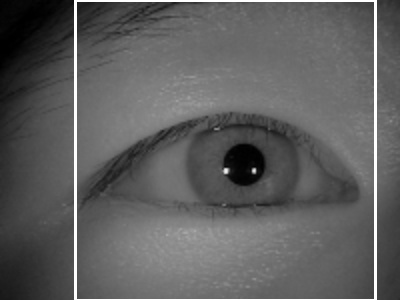

### Here, the core eye segmentation occurs. The eyes images are gone through number of noise removal techniques like morphological operations, noise removal through contour feature extraction.

In [ ]:

eye_images= iris_detected       
kernel = np.ones((5,5),np.uint8)

import random
random.shuffle(eye_images)

test=[]
for i,j,k,ctr in eye_images:

    #for setting the threshold
    p1,p2,p3 = image_transformer(i,0)
    result = sum(sum(p1))
    flag = True

    for k in range(10,10000,10):
        working_eye_image,eye_opening,eye_closing = image_transformer(i,k)
        suming = sum(sum(working_eye_image))
        difference = suming-result

        if difference > 800:
            flag = False

            print("Image Threshold = " ,k)
            print("Image Name " +str(j)+"\n")

            path1 = '/Users/avantikamahalingam/Desktop/Biometrics/Iris/threshold/'
            path2 = '/Users/avantikamahalingam/Desktop/Biometrics/Iris/opening/'
            path3 = '/Users/avantikamahalingam/Desktop/Biometrics/Iris/closing/'
            if not cv2.imwrite(os.path.join(path1, str(k)+'.'+str(j)+'.jpg'), working_eye_image): print("couldn't save")
            if not cv2.imwrite(os.path.join(path2, str(k)+'.'+str(j)+'.jpg' ),eye_opening): print("couldn't save")
            if not cv2.imwrite(os.path.join(path3, str(k)+'.'+str(j)+'.jpg'),eye_closing): print("couldn't save")
            
            eye_cont,_ = cv2.findContours(working_eye_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            for cont in eye_cont:
                a,b,wid,hgt = cv2.boundingRect(cont)
                if a+wid < 150 and b+hgt < 200 and (a-wid)//4 > 0:
                    cv2.rectangle(working_eye_image,(a,b),(a+wid,b+hgt),(0,255,0),-2)
                    path1_ = '/Users/avantikamahalingam/Desktop/Biometrics/Iriscontour/'
                    cv2.imwrite(os.path.join(path1_,str(k)+'.'+str(j)+'.jpg'),working_eye_image)

            eye_conts,_ = cv2.findContours(working_eye_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            max_area=0
            max_wid=0
            p_x=0
            p_y=0
            max_hgt = 0
            for cont in eye_conts:
                a,b,wid,hgt = cv2.boundingRect(cont)
                new_area = hgt*wid
                if a+wid<150 and b+hgt<200 and new_area>max_area and a-wid//4>0:
                    max_area = new_area
                    max_wid=wid
                    p_x=a
                    p_y=b
                    max_hgt = hgt

            center_x = (p_x+max_wid)//2
            center_y = (p_y+max_hgt)//2
            rad = 40

            if center_y-rad>0 and center_x-rad >0  and center_y+rad < 200 and center_x+rad < 150:
                iris_updated_roi = ctr[center_y-rad:center_y+rad, center_x-rad:center_x+rad]
                iris_updated_roi=cv2.resize(iris_updated_roi,(200,150))
                path3_ = '/Users/avantikamahalingam/Desktop/Biometrics/Iris/final_iris/'
                cv2.imwrite(os.path.join(path3_, str(k)+'.'+str(j)+'.jpg'),iris_updated_roi)
            else:
                center_y=ctr.shape[0]//2
                center_x=ctr.shape[1]//2
                iris_updated_roi = ctr[center_y-rad:center_y+rad, center_x-rad:center_x+rad]
                iris_updated_roi =cv2.resize(iris_updated_roi,(200,150))
                cv2.imwrite('final_iris/'+str(k)+'.'+str(j)+'.jpg',iris_updated_roi)

            cv2.imwrite('edging_5/'+str(k)+'_'+str(j)+'.jpg',i)
            test.append(i)
            final_irisdata.append(iris_updated_roi)
            y_eye_labels.append(k)

    if flag :
        i =cv2.resize(i,(200,150))
        path3_ = '/Users/avantikamahalingam/Desktop/Biometrics/Iris-Recognition-CASIA-Iris-Thousand-master/final_casia/'
        cv2.imwrite(os.path.join(path3_, str(k)+'.'+str(j)+'.jpg'),iris_updated_roi)

print("Final output = ",len(final_irisdata))
print("Number of y_eye_labels = ",len(y_eye_labels))

### The Final output from the images looks something like this:

### Step 1: Threshold setting for the iris
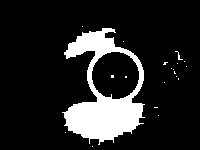

### Step2: Processing features from contour opening operation of OpenCV
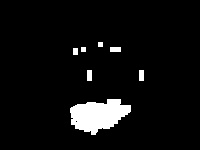

### Step3: Processing features from contour closing operation of OpenCV
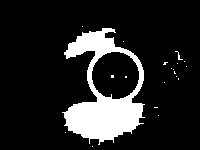

### Step 4: Final images ready to be trained with the model
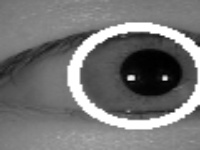